# **Diabetic Hospital Readmission Classification**

# Overview

# Business Problem

Hospital readmission for diabetic patients is a significant business problem with potential implications for patient outcomes and healthcare costs. 

1. Impact on Patient Health: Hospital readmission for diabetes is associated with worse long-term outcomes for patients. Poorly controlled diabetes during the initial hospitalization can lead to complications and disease progression, including cardiovascular events, kidney problems, infections, and diabetic ketoacidosis. Inadequate management and fragmented care transitions contribute to gaps in follow-up care, medication adherence, and lifestyle management, further impacting patient health and well-being.

2. Healthcare Resource Utilization: Hospital readmissions for diabetes impose a substantial burden on the healthcare system. Repeated hospitalizations increase healthcare utilization and costs, straining healthcare resources. Additionally, fragmented care and lack of continuity disrupt the establishment of consistent and effective care plans, hindering disease management and potentially leading to avoidable readmissions.

3. Need for Comprehensive Solutions: Addressing hospital readmission for diabetic patients requires comprehensive solutions. Improving care coordination, patient education, medication management, discharge planning, and post-discharge follow-up are essential components. By focusing on these areas, healthcare providers can promote continuity of care, reduce readmission rates, improve patient outcomes, and mitigate the financial impact on the healthcare system.

In summary, hospital readmission for diabetic patients presents a significant business problem due to its impact on patient health outcomes and healthcare resource utilization. A comprehensive approach that addresses care coordination and continuity is crucial for reducing readmission rates, improving patient outcomes, and optimizing healthcare costs.

The classification model created in this project will be able to shed light on specific features included in the model that have the highest effect on readmission which hospitals can use to streamline their policies and methodologies in care coordination.

# Data

The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The target for this classification model was `readmission` and it originally started off as multiclass (no, >30, <30) but for this model, we focused on the binary problem.

There are information on the features in IDs_mapping.csv as well as the paper cited below. The IDs_mapping.csv is specifically used when binning the three features (admission_id, discharge_disposition_id, as well as admission_source).

(Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.)

# Imports

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder

import statsmodels.api as sm  
import itertools

In [59]:
# setting the theme, palette, size for all plots made in this notebook
sns.set_theme(style="whitegrid")
sns.set_palette('colorblind')
sns.set(rc={'savefig.dpi':200})

In [3]:
# importing data
df = pd.read_csv('./data/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# EDA

In [4]:
display(df.shape)
display(df.info())
display(df.describe())

(101766, 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

None

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


There are a total of 101766 data points and 50 different columns in this dataset. 101,766 encounters were identified to fulfill all of the above five inclusion criteria, stated in the 'Data' section, and were used in further analysis. Attribute/feature selection was performed by our clinical experts and only attributes that were potentially associated with the diabetic condition or management were retained. The 50 features describes the diabetic encounters, including demographics, diagnoses, diabetic medications, number of visits in the year preceding the encounter, and payer information. All of these features describe the patients' current state and will be useful in classifying which patients will be readmitted. There seems be no null in this dataset, however, the paper cited in the 'Data' section mentions that the nulls are marked differently.

## Null Values

In [5]:
# In the dataset missing values are represented as '?' sign so isna will return that there are no nulls
# for the gender column missing values are logged in as unknown

missing_value_count = df.isin(['?', 'Unknown/Invalid']).sum()
print(missing_value_count)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

There are eight features that have null values. I will go through each of them and handle the unknowns according to how many are missing and if it is data that can be filled in.

### Dropping Columns and taking care of null values

In [6]:
# Creating a copy of the DataFrame
df_clean = df.copy()

In [7]:
#dropping columns with large number of missing values
df_clean = df_clean.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [8]:
#sanity check
df.shape, df_clean.shape

((101766, 50), (101766, 47))

In [9]:
# Dropping all the the null values (marked with ?) in diag_1,2,3
# It doesn't makes sense for me to fill it in with the most frequeent

drop_conditions = (
    (df_clean['diag_1'] == '?') |
    (df_clean['diag_2'] == '?') | 
    (df_clean['diag_3'] == '?') |
    (df_clean['race'] == '?') |
    (df_clean['gender'] == 'Unknown/Invalid')
)

drop_rows = set(df_clean[drop_conditions].index)
new_rows = list(set(df_clean.index) - drop_rows)
df_clean = df_clean.iloc[new_rows]

In [10]:
# re-checking for null values after dropping
df_clean.isin(['?', 'Unknown/Invalid']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

### Dropping deceased patients
Dropping patients that are deceased so that it will not bias the model.

In [11]:
# The definitions of the different numbers can be found in IDs_mapping.csv

discharge_codes_to_exclude = [11, 13, 14, 19, 20, 21]
df_clean = df_clean[~df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude)]

In [12]:
# sanity check
df_clean.shape

(95672, 47)

## Graphing all features

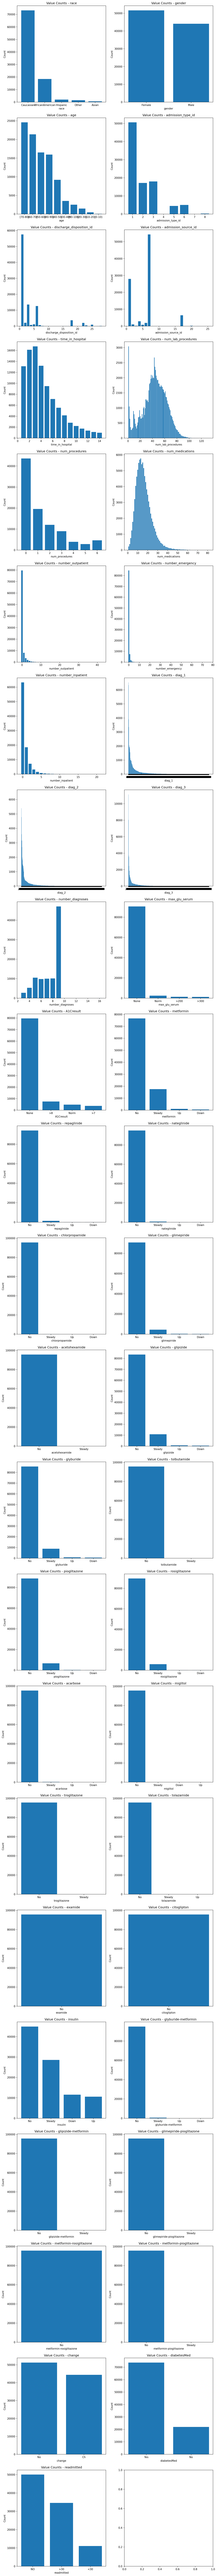

In [20]:
# Define the starting index for slicing the DataFrame columns
# I don't need to graph the encounter_id nor the patient_id
start_index = 2

# Calculate the number of columns to display on each row
columns_per_row = 2

# Calculate the total number of rows needed
total_rows = (len(df_clean.columns) - start_index) // columns_per_row + (
    (len(df_clean.columns) - start_index) % columns_per_row > 0)

# Create subplots
fig, axes = plt.subplots(total_rows, columns_per_row, 
                         figsize=(12, total_rows * 6), dpi=150)
fig.tight_layout(pad=4.0)

# Iterate over the columns in the DataFrame
for i, column in enumerate(df_clean.columns[start_index:]):
    # Calculate value counts for the column
    value_counts = df_clean[column].value_counts()

    # Calculate the subplot indices
    row_index, col_index = divmod(i, columns_per_row)

    # Create a bar plot for the value counts in the appropriate subplot
    axes[row_index, col_index].bar(value_counts.index, value_counts)
    axes[row_index, col_index].set_title(f'Value Counts - {column}')
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Count')

    # Hide any unused subplots
    if i + 1 >= total_rows * columns_per_row:
        break

# Display the subplots
plt.show()

### Explorationn of specific columns

In [33]:
# checking target group to see if there is a class inbalance
df_clean['readmitted'].value_counts()

NO     50043
>30    34606
<30    11023
Name: readmitted, dtype: int64

There are three groups: 
- No (not readmitted), 
- \>30 (readmitted but not within 30 days), 
- <30 (readmitte within 30 days)).

I will first make a model with biany yes or no readmission and another with multi-class in the future.

In [34]:
# checking for duplicated patients
display(df_clean['patient_nbr'].duplicated().sum())
display(df_clean['encounter_id'].duplicated().sum())

28544

0

Checked for duplicated entried but there are no duplicated entries since the encounter id are all different. This might come to be usefull when we want to focus on patients who were readmitted.

Since we do not want duplicated patients to bias towards those patients who had multiple encounters, I decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 67,000 encounters:

In [35]:
df_clean = df_clean.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [36]:
df_clean.shape

(67128, 47)

In [45]:
# drugs that have one category
df_clean['examide'].value_counts(), df_clean['citoglipton'].value_counts()

(No    67128
 Name: examide, dtype: int64,
 No    67128
 Name: citoglipton, dtype: int64)

Although examide, citoglipton, glimepiride-pioglitazone, and metformin-rosiglitazone don't have any patients that have these drugs in their regimen, I will keep these for future modeling use.

There could be patients that later switch onto these drugs, and so I will leave these columns for future data.

# Feature Engineering

## readmit_binary
Creating a binary column for readmission, which originally has three categories, for modeling.

In [13]:
# creating a column for binary target model
df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(int)

Class 0 means no record of readmission and 1 means yes readmission, whether it is within 30 days or not. 

In [14]:
df_clean['readmit_binary'].value_counts()

0    50043
1    45629
Name: readmit_binary, dtype: int64

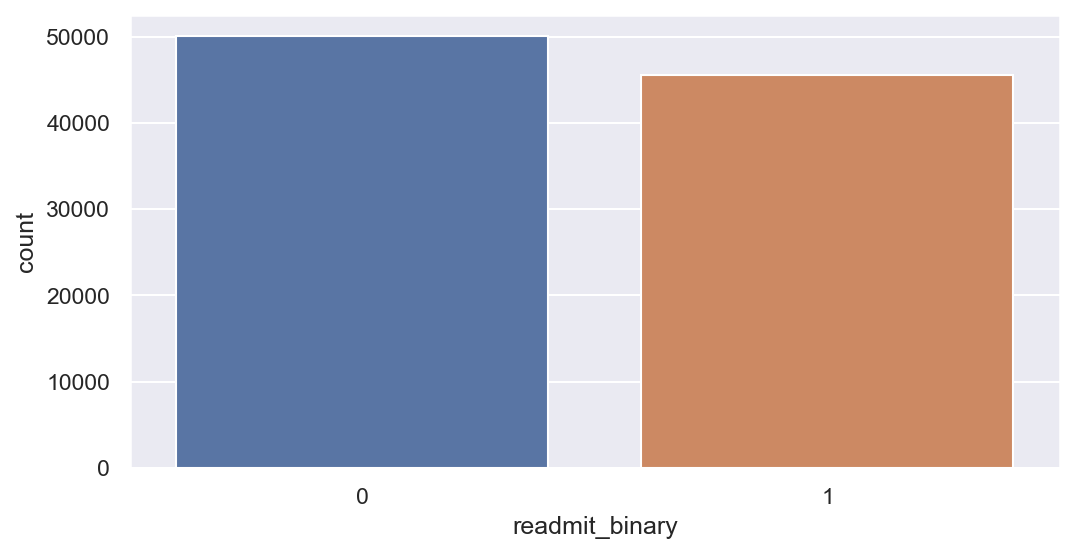

In [60]:
fig, axs = plt.subplots(figsize = (8, 4), dpi = 150)

sns.countplot(data = df_clean, x = "readmit_binary")
plt.show()

## num_change
There are a lot of drugs in this dataset and so I am making a column named 'num_change' to indicate how many timmes a patient's medication changes. The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. 

According to literature, medication change has been shown to be associated with lower readmission rates. I decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [16]:
# looking at one drug for categories
df_clean['metformin'].value_counts()

No        76568
Steady    17541
Up         1013
Down        550
Name: metformin, dtype: int64

In [17]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
        'troglitazone', 'tolbutamide', 'acetohexamide',
        'examide', 'citoglipton'
       ]

In [18]:
# Create temporary columns and calculate 'numchange'
for col in drugs:
    colname = f'{col}_temp'
    df_clean[colname] = df_clean[col].map({'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1})
df_clean['num_change'] = df_clean[[f'{col}_temp' for col in drugs]].sum(axis=1)

# Drop the temporary columns
df_clean.drop(columns=[f'{col}_temp' for col in drugs], inplace=True)

# Display the value counts of 'numchange'
df_clean['num_change'].value_counts()

0    69598
1    24701
2     1262
3      106
4        5
Name: num_change, dtype: int64

In [19]:
# sanity check
df_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_binary', 'num_change'],
      dtype='object')

In [20]:
df_clean.groupby('num_change')['readmit_binary'].value_counts().sort_values(ascending=False)

num_change  readmit_binary
0           0                 37727
            1                 31871
1           1                 13077
            0                 11624
2           0                   636
            1                   626
3           1                    53
            0                    53
4           0                     3
            1                     2
Name: readmit_binary, dtype: int64

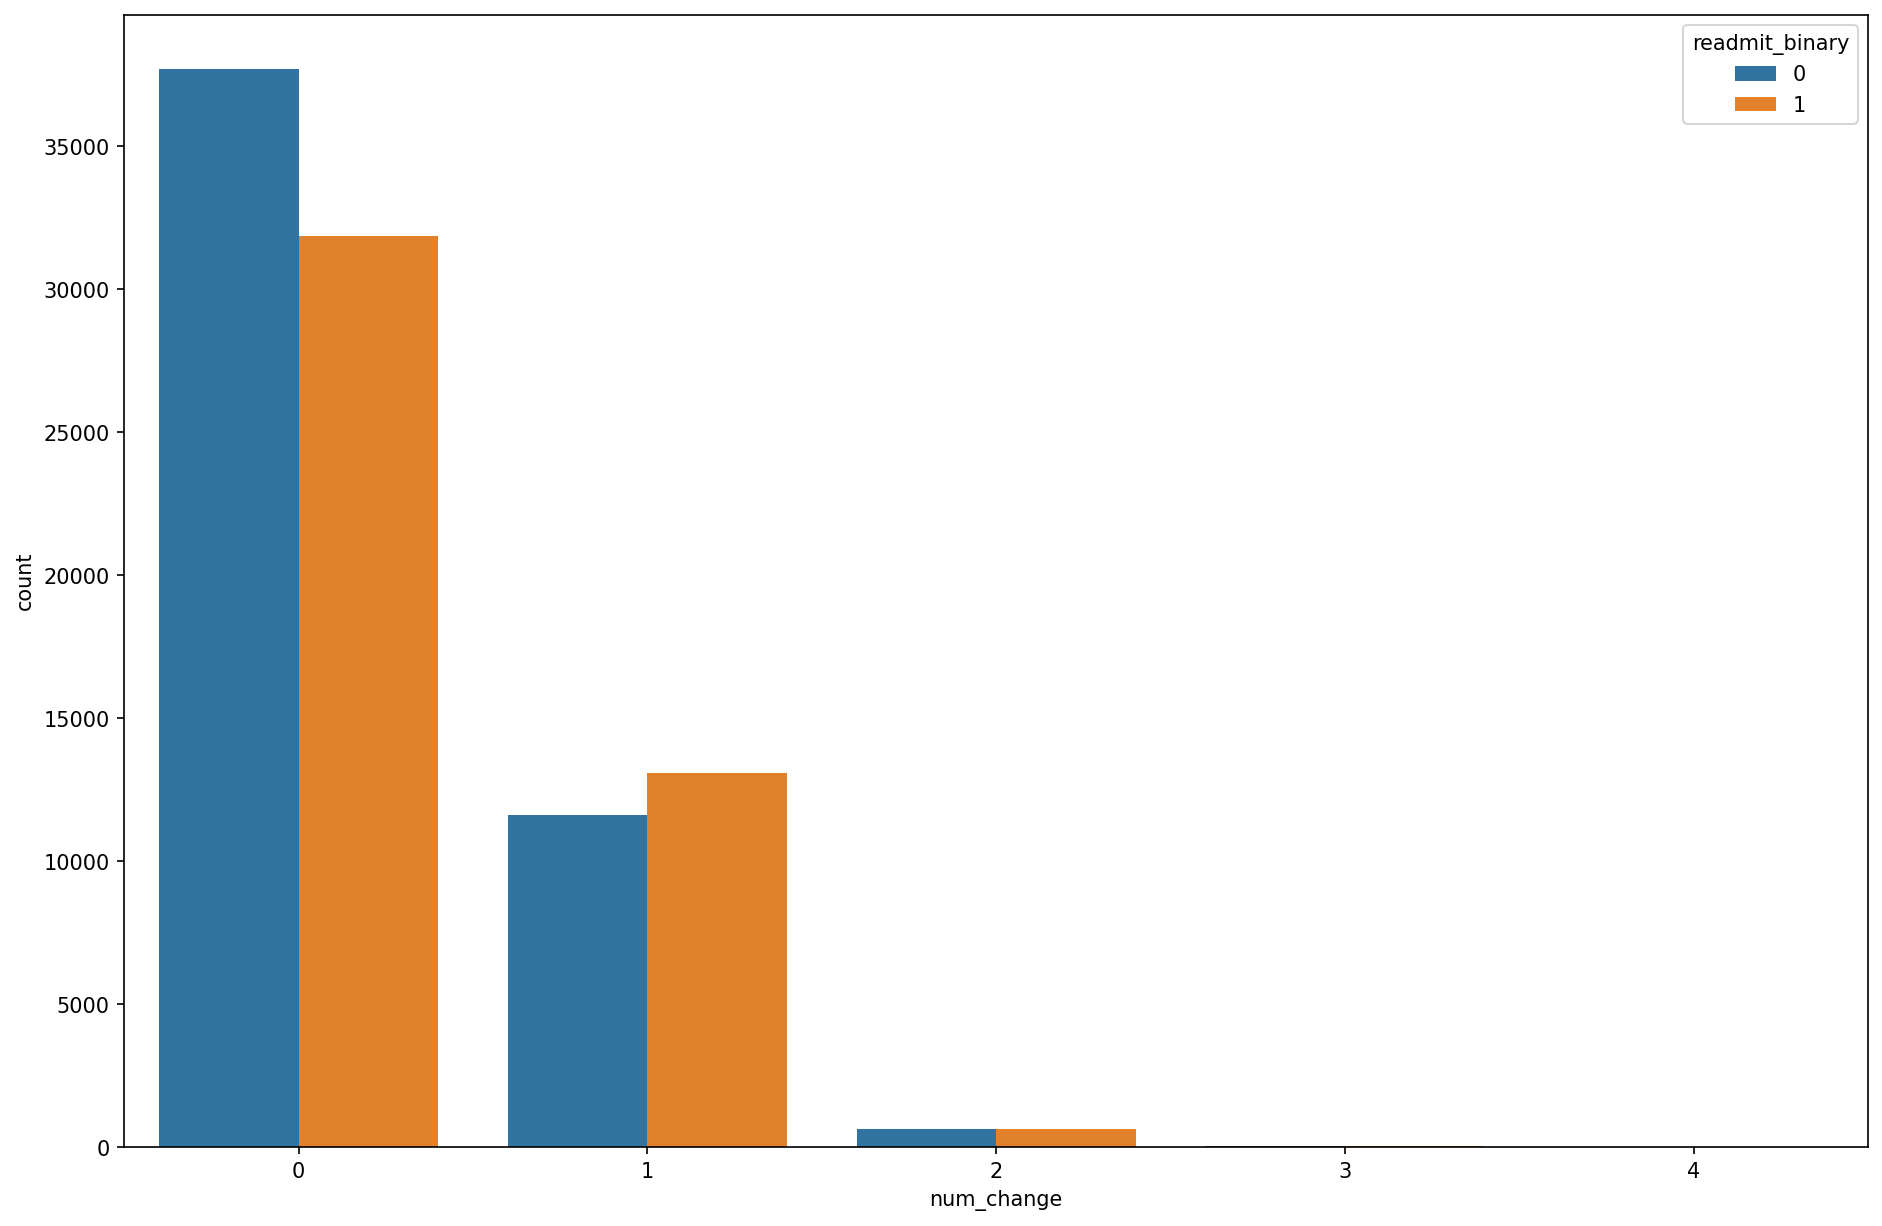

In [21]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "num_change", hue = "readmit_binary")
plt.show()

Seems like in this data, there are more patients who have been not readmitted with zero number of medication changes. This is what we expect according to literature. It is important to not that there seems to be more people who have not been readmitted in the other number of changes as well.

## num_meds

The total number of medications used by a patient could be another factor that potentially relates to their condition severity and the level of care required. To capture this information, I generated an additional feature by counting the medications used during each encounter. This feature was derived from the 'drugs' variable, which is a continuation from the previous code.

It is important to know that this is different from num_medications already in the dataframe since it means "Number of distinct generic names administered during the encounter" not number of medications that the patient is on.

In [22]:
# counting categories that are not no and adding them to num_meds
df_clean['num_meds'] = df_clean[drugs].apply(lambda x: (x != 'No').sum(), axis=1)

In [23]:
df_clean['num_meds'].value_counts()

1    44184
0    21938
2    20782
3     7417
4     1289
5       57
6        5
Name: num_meds, dtype: int64

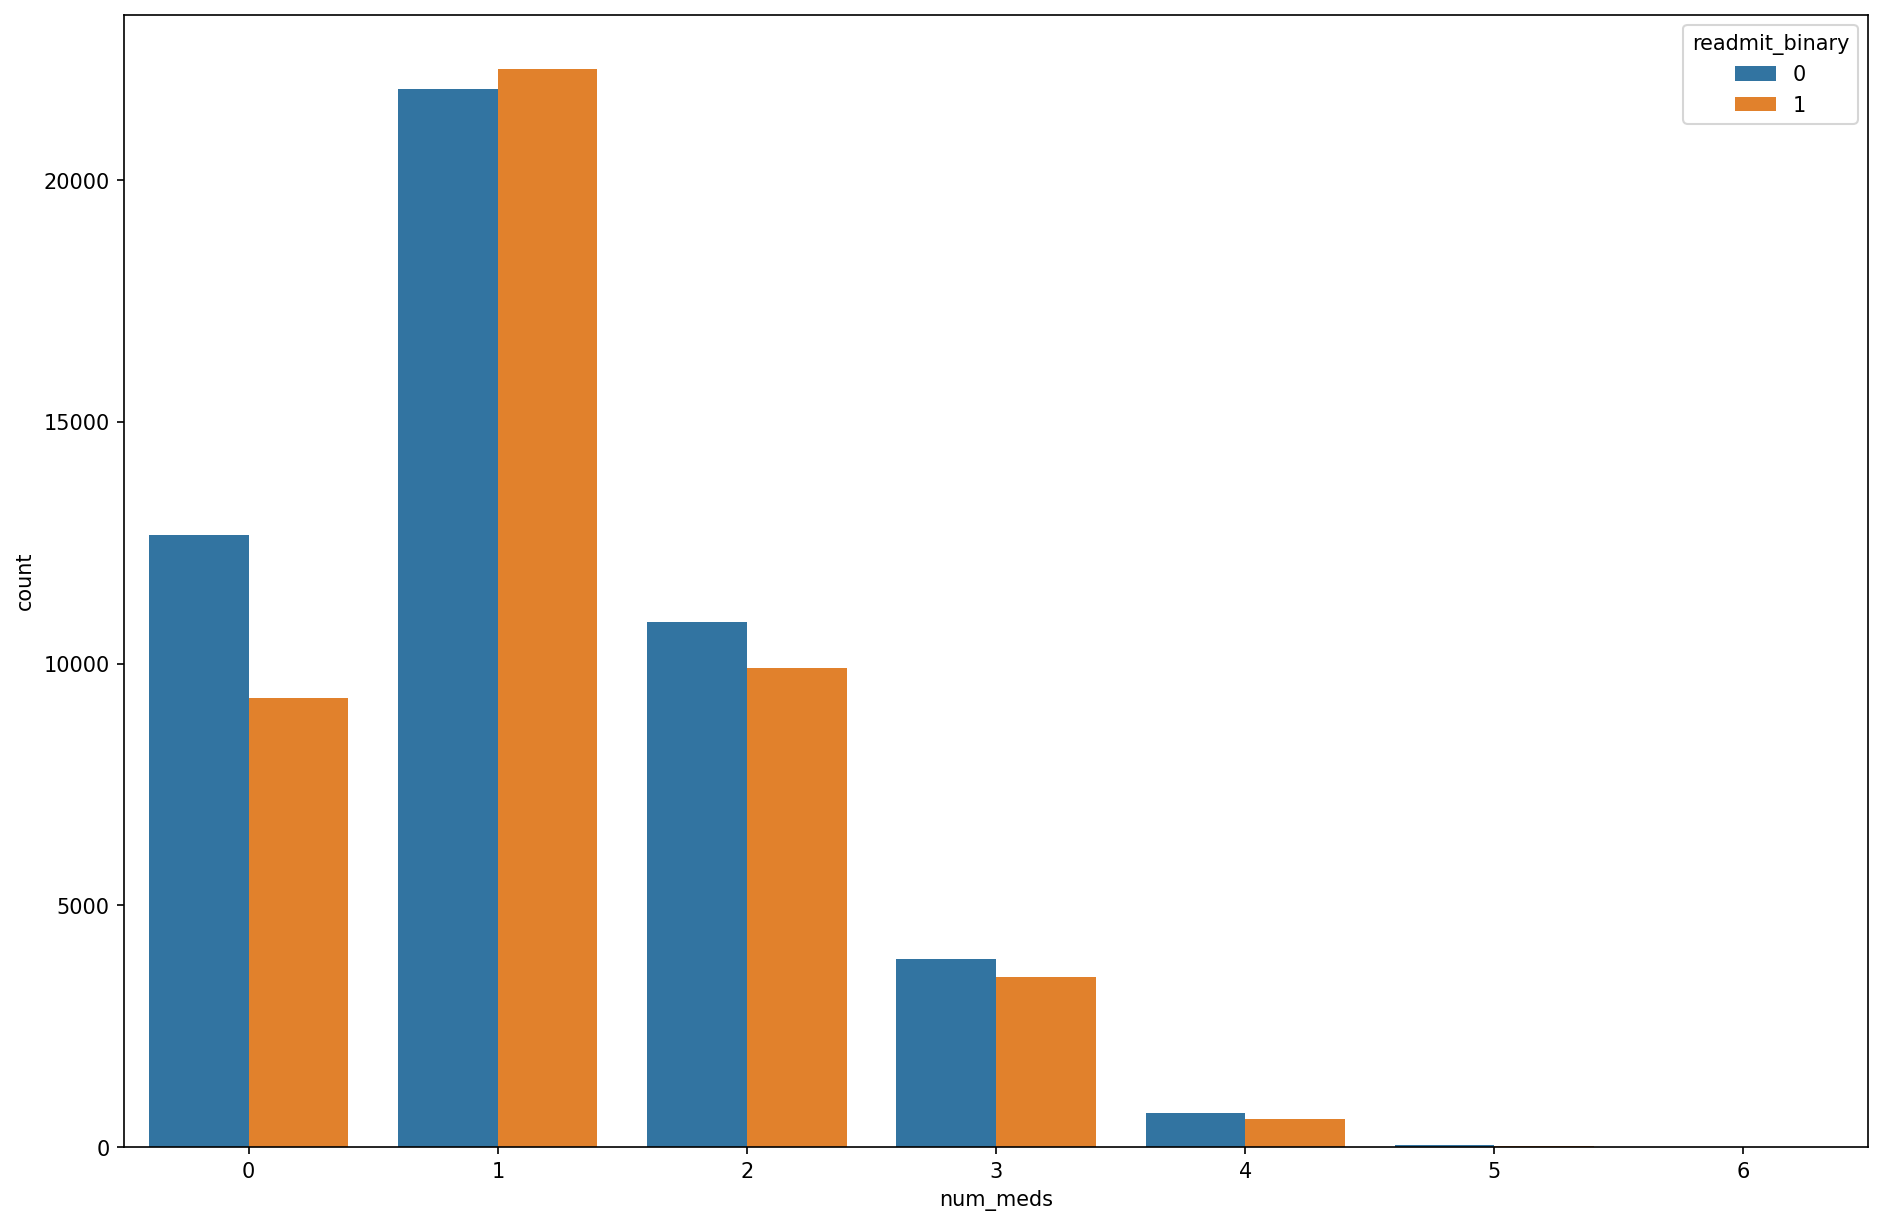

In [24]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "num_meds", hue = "readmit_binary")
plt.show()

Text(0.5, 1.0, 'Number of Medication VS. Readmission')

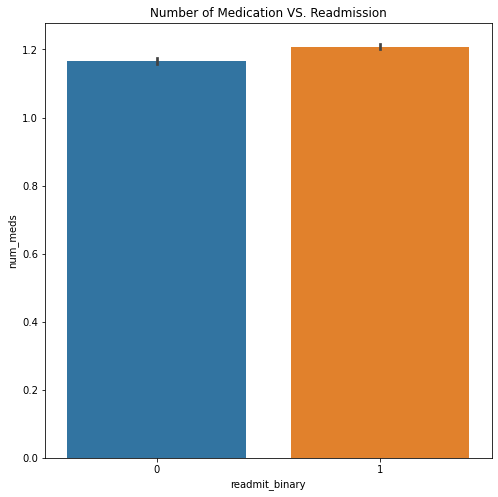

In [25]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df_clean['num_meds'], 
            x = df_clean['readmit_binary']
           ).set_title('Number of Medication VS. Readmission')

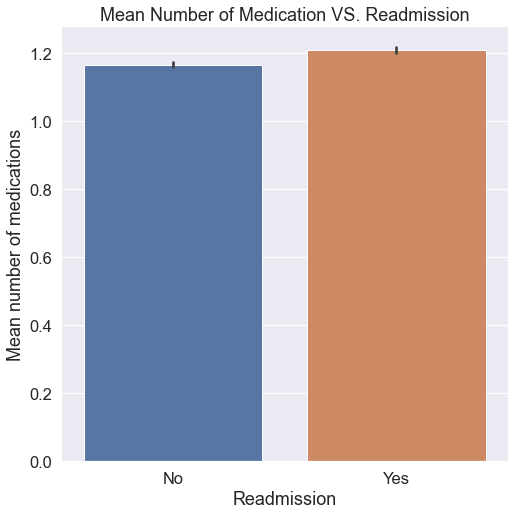

''

<Figure size 1080x432 with 0 Axes>

In [72]:
fig = plt.figure(figsize=(8, 8))
ax = sns.barplot(x=df_clean['readmit_binary'], y=df_clean['num_meds'])

# Set the x tick labels
ax.set_xticklabels(['No', 'Yes'])

# Set the axis labels
ax.set_xlabel('Readmission')
ax.set_ylabel('Mean number of medications')

# Set the title
ax.set_title("Mean Number of Medication VS. Readmission")

plt.show()

plt.savefig('images/num_meds.png')
;

We can see that although for all the categories there are more patients that do not get readmitted, the second graph shows that the number of medication taken by the patients who are readmitted are higher than those who are not.

## num_service

The dataset includes variables that capture the count of inpatient admissions, emergency room visits, and outpatient visits for each patient over the course of the previous year. These variables serve as rough indicators of the extent to which a person utilized hospital and clinic services during that period. 

To explore the impact of these utilization measures on the results, I combined the three variables into a new composite variable called "num_service". I didn't assign specific weights to the three components of service utilization at this stage and opted for a straightforward approach to gauge their collective influence.

In [28]:
df_clean['num_service'] = df_clean[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)

In [29]:
df_clean['num_service'].value_counts()

0     51996
1     18934
2      9552
3      5590
4      3384
5      1953
6      1249
7       838
8       533
9       419
10      261
11      243
12      135
13       97
15       94
14       85
16       65
17       58
18       31
19       30
20       22
22       14
21       13
24        9
27        9
25        7
26        5
29        5
36        5
35        5
30        4
23        4
38        2
37        2
42        2
33        2
32        2
31        2
28        2
68        2
41        1
48        1
49        1
40        1
34        1
80        1
61        1
Name: num_service, dtype: int64

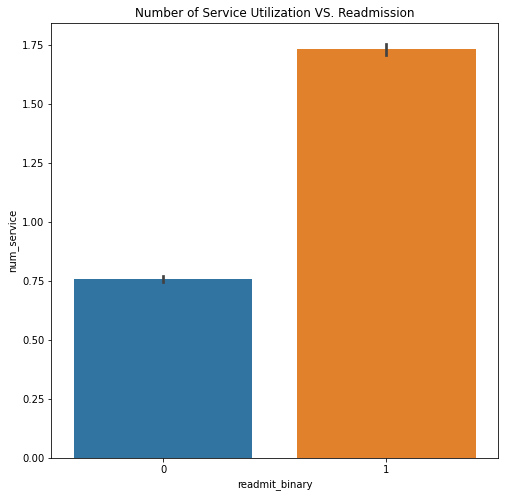

In [30]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df_clean['num_service'], 
            x = df_clean['readmit_binary']
           ).set_title('Number of Service Utilization VS. Readmission');

This is the most drastic difference so far seen where there are more patients that have been readmitted. This shows that the patients who do get readmitted use more services during their visit than patients who do not get readmitted.

# Re-coding columns to make fewer categories

The original categories for the first three features can be found in IDs_mapping.csv in the 'Data' folder.

## Admission_source_id

Admission source id has a total of 26 categories and few of them can be re-coded into one category

In [31]:
admission_source_mapping = {1: "referral", 2: "referral", 3: "referral",
                            4: "transfer", 5: "transfer", 6: "transfer",
                            10: "transfer", 22: "transfer", 25: "transfer",
                            8: "unavailable", 14: "unavailable", 11: "unavailable",
                            13: "unavailable", 9: "unavailable", 15: "unavailable",
                            17: "unavailable", 20: "unavailable", 21: "unavailable",
                            7: "emergencyRoom"
                           }

df_clean['admission_source_id'] = df_clean['admission_source_id'].replace(admission_source_mapping)

In [32]:
df_clean['admission_source_id'].value_counts()

emergencyRoom    54333
referral         29150
unavailable       6619
transfer          5570
Name: admission_source_id, dtype: int64

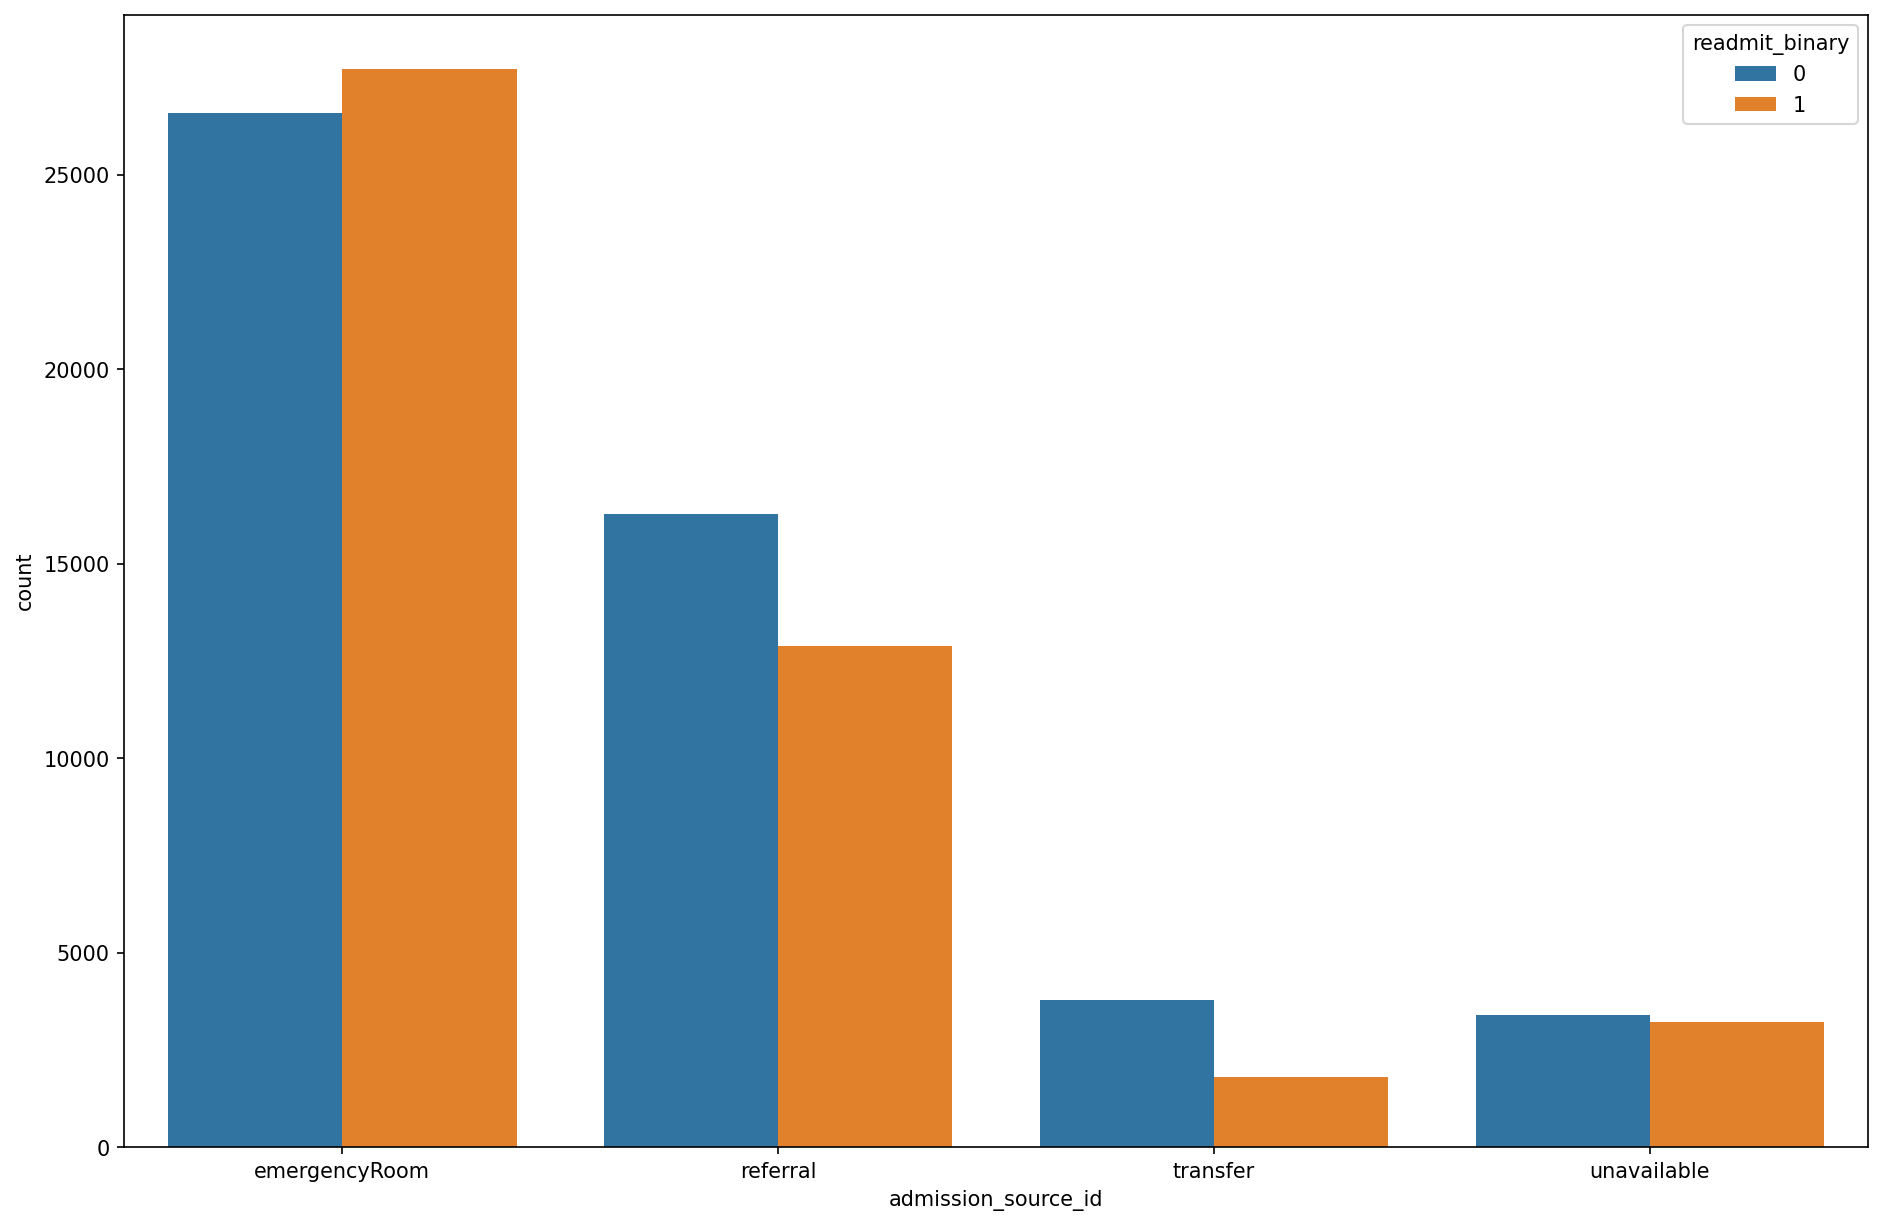

In [33]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "admission_source_id", hue = "readmit_binary")
plt.show()

## Admission_id

In [34]:
# Admission type has a total of eight categories and few of them can be re-coded into one category
admission_type_mapping = {2: 1, 7: 1, 6: 5, 8: 5}
df_clean.loc[:, 'admission_type_id'] = df_clean.loc[:, 
                                                    'admission_type_id'
                                                   ].replace(admission_type_mapping)

In [35]:
df_clean['admission_type_id'].value_counts()

1    67806
3    17998
5     9858
4       10
Name: admission_type_id, dtype: int64

In [36]:
admission_type_mapping = {1: "emergency", 3: "elective", 4: "newborn", 5: "not_available"}
df_clean.loc[:,'admission_type_id'] = df_clean.loc[:, 'admission_type_id'].replace(admission_type_mapping)

In [37]:
df_clean['admission_type_id'].value_counts()

emergency        67806
elective         17998
not_available     9858
newborn             10
Name: admission_type_id, dtype: int64

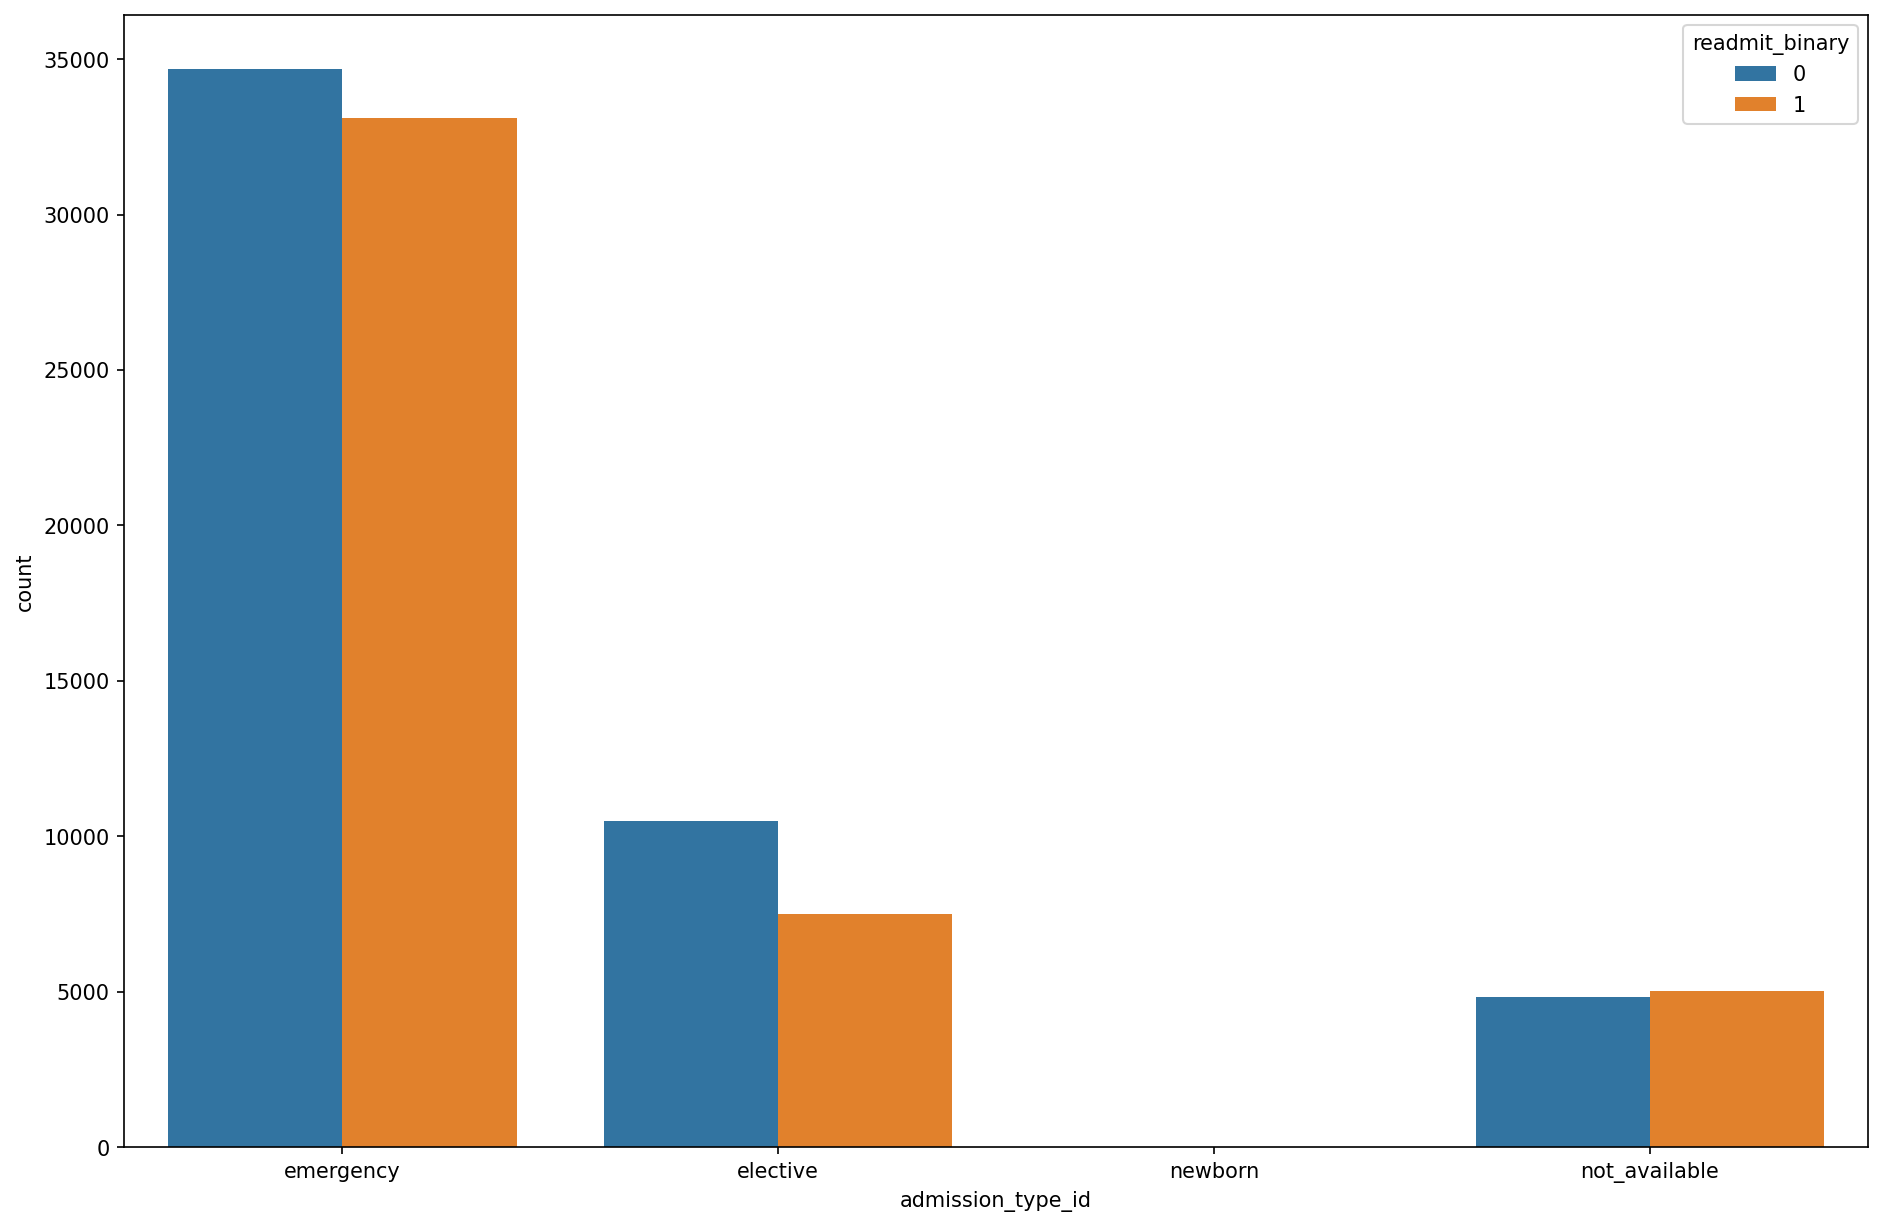

In [38]:
# Define the desired order of categories
admission_category_order = ['emergency', 'elective', 'newborn', 'not_available']

fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "admission_type_id", hue = "readmit_binary", order = admission_category_order)
plt.show()

## Discharge_disposition_id

In [39]:
# re-coding categories into similar categories. 
# The definitions of the different numbers can be found in IDs_mapping.csv

discharge_mapping = {6: 1, 8: 1, 9: 1, 
                     3: 2, 4: 2, 5: 2, 22: 2, 23: 2, 24: 2, 27: 2, 28:2, 
                     10: 12, 15: 12, 16: 12, 17: 12, 
                     25: 18, 26: 18}

df_clean.loc[:, 'discharge_disposition_id'] = df_clean.loc[:, 
                                                           'discharge_disposition_id'
                                                          ].replace(discharge_mapping)

In [40]:
df_clean['discharge_disposition_id'].value_counts()

1     70362
2     20056
18     4565
7       592
12       97
Name: discharge_disposition_id, dtype: int64

In [41]:
discharge_type_mapping = {1: "home", 2: "transfered", 7: "left_AMA", 12: 
                          "outpatient", 18: "not_available"}
df_clean.loc[:, 'discharge_disposition_id'] = df_clean.loc[
    :, 'discharge_disposition_id'].replace(discharge_type_mapping)

In [42]:
df_clean['discharge_disposition_id'].value_counts()

home             70362
transfered       20056
not_available     4565
left_AMA           592
outpatient          97
Name: discharge_disposition_id, dtype: int64

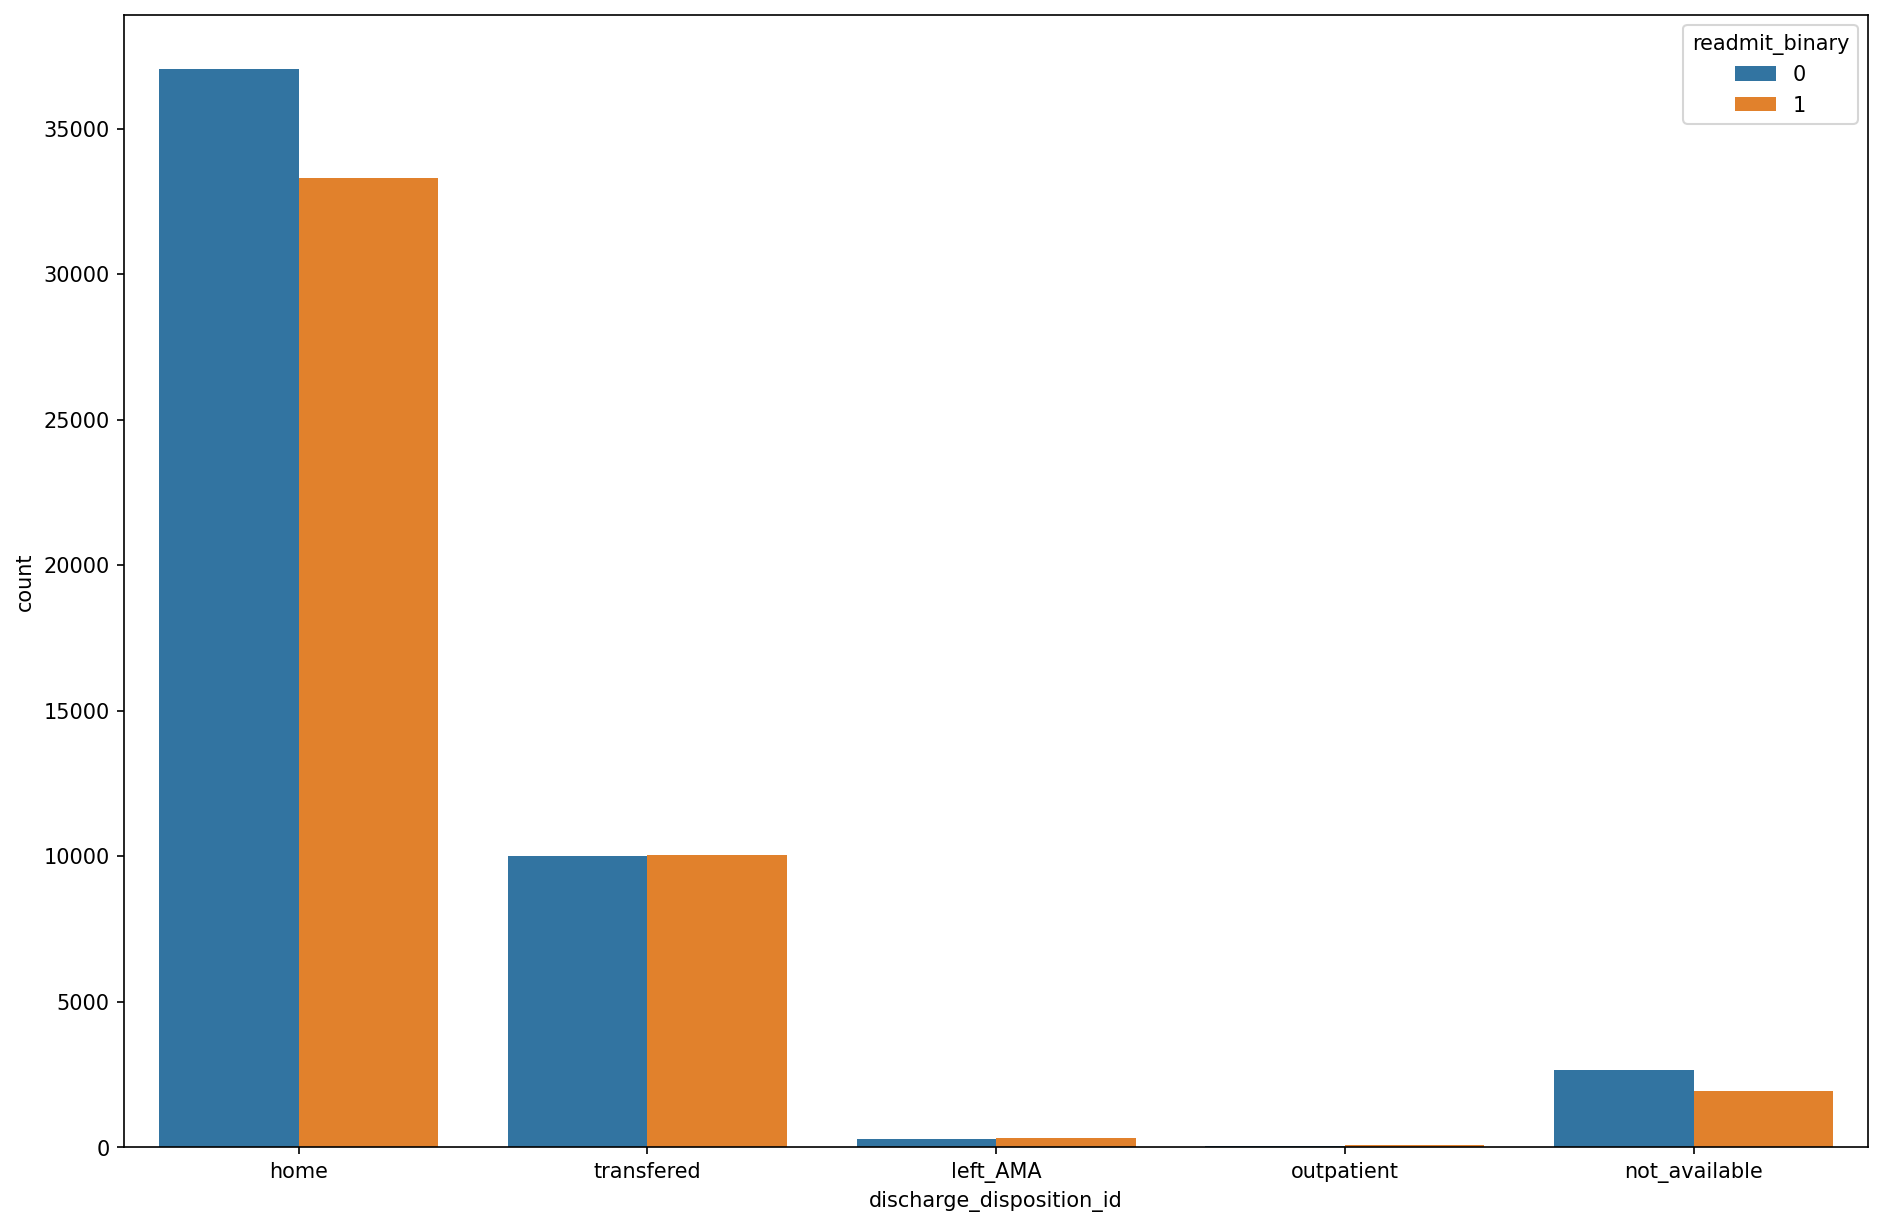

In [43]:
# Define the desired order of categories
discharge_category_order = ['home', 'transfered', 'left_AMA', 'outpatient', 'not_available']

# plotting column agaisnt target
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "discharge_disposition_id", hue = "readmit_binary", order=discharge_category_order)
plt.show()

## Diagnosis 1, 2, & 3

Diagnosis 1,2,& 3 shows the primary diagnosis (coded as first three digits of ICD9), secondary, and dditional secondary diagnosis.

I got the ICD-code categories from https://www.aapc.com/codes/icd9-codes-range/ since the columns contain the firs three numbers of the ICD-code. I mapped the data so that the numbers will be set as their assigned category.

In [44]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459-389)),
            ('respiratory', (519-459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

The `categorize_diagnosis` function is used to assign numerical values to specific categories. It takes in a numerical value and a list of categories, where each category is represented by a tuple containing a category name and a corresponding range value. The function attempts to convert the input value to a float and then iterates through the list of categories. It checks if the value falls within the range of each category and returns the corresponding category if it does. If the value is greater than the range for a category, it subtracts the range value and moves to the next category. If the value cannot be converted to a float or doesn't match any category, it returns 'unknown'.

The `replace_diag_values` function is used to transform diagnosis values. It takes in a value, typically a diagnosis code, and checks if the first character, converted to lowercase, is either 'v' or 'e'. If it matches, the function returns 'other'. Otherwise, it returns the original value. This function is often used in data preprocessing or feature engineering tasks to categorize or replace certain diagnosis codes with a more generalized category, such as 'other'.

In [45]:
def categorize_diagnosis(value, categories):
    try:
        value = float(value)  # Convert value to a float
        for category, range_value in categories:
            if value <= range_value:
                return category
            else:
                value -= range_value
    except ValueError:
        pass
    return 'unknown'

def replace_diag_values(value):
    if value[0].lower() in ['v', 'e']:
        return 'other'
    else:
        return value

In [46]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))
    df_clean[column] = df_clean[column].apply(replace_diag_values)

In [47]:
display(df_clean['diag_1'].value_counts())
display(df_clean['diag_2'].value_counts())
display(df_clean['diag_3'].value_counts())

circulatory        28792
other              10405
respiratory         9612
digestive           8792
ill-defined         7392
injury              6590
genitourinary       4834
musculoskeletal     4717
neoplasms           3013
infections          2477
skin                2416
mental              2139
unknown             1589
blood               1068
nervous              892
pregnancy            645
sense                250
congenital            49
Name: diag_1, dtype: int64

circulatory        29938
other              19530
respiratory         9512
genitourinary       7605
ill-defined         4372
digestive           3770
skin                3415
blood               2795
mental              2540
unknown             2429
injury              2286
neoplasms           2274
infections          1796
musculoskeletal     1707
nervous             1043
pregnancy            407
sense                152
congenital           101
Name: diag_2, dtype: int64

circulatory        28593
other              25240
respiratory         6284
genitourinary       5949
unknown             4936
ill-defined         4302
digestive           3436
mental              3025
blood               2399
skin                2378
musculoskeletal     1845
injury              1844
infections          1772
neoplasms           1626
nervous             1396
pregnancy            302
sense                255
congenital            90
Name: diag_3, dtype: int64

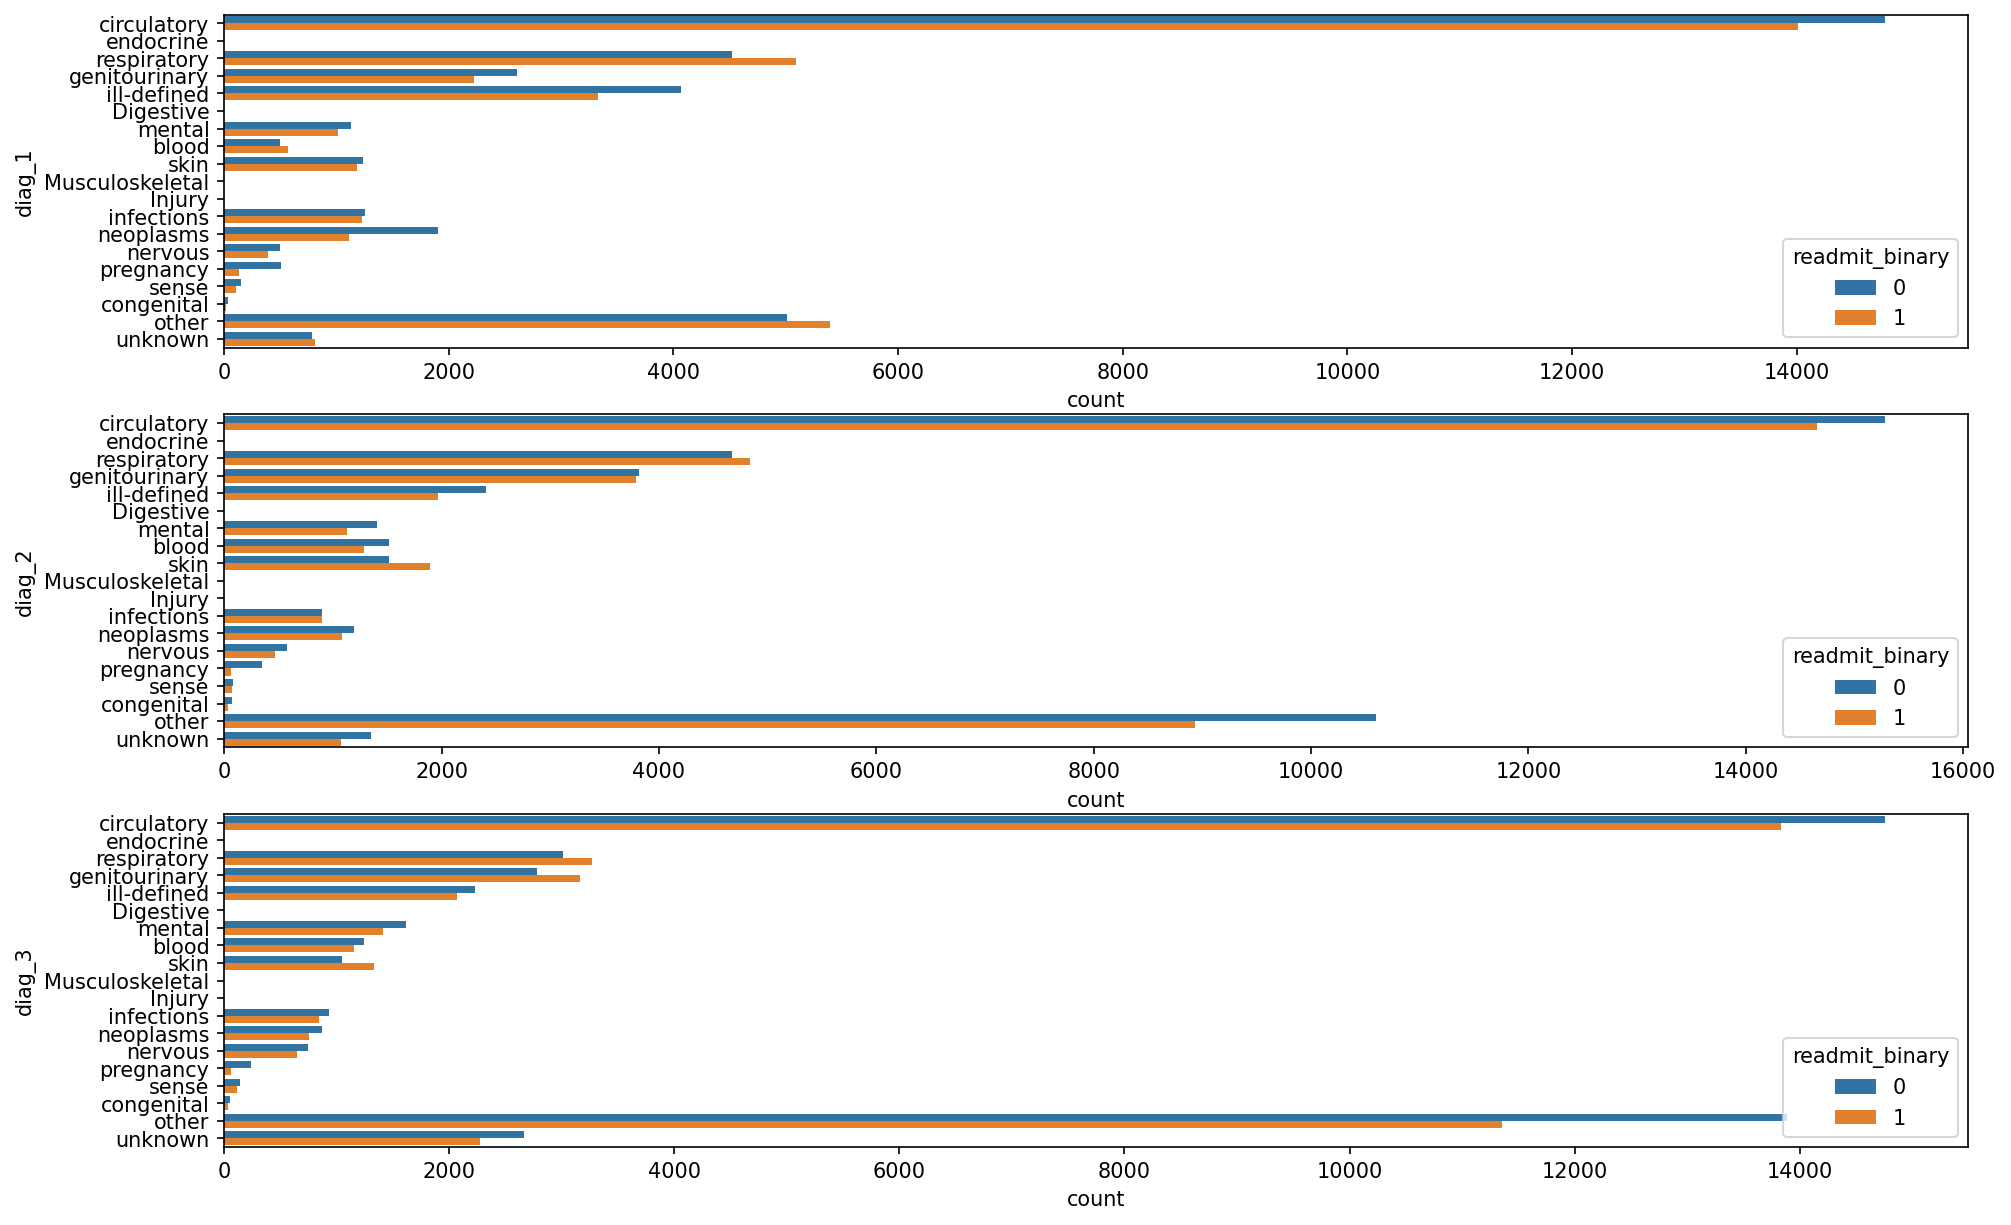

In [48]:
list_diag = ['circulatory', 'endocrine', 'respiratory', 'genitourinary', 
             'ill-defined', 'Digestive', 'mental', 'blood', 'skin', 
             'Musculoskeletal', 'Injury', 'infections', 'neoplasms', 'nervous', 
             'pregnancy', 'sense', 'congenital', 'other',  'unknown']

# graph
fig, axs = plt.subplots(3, 1, figsize = (15, 10), dpi=150)

sns.countplot(data = df_clean, y = "diag_1", hue = "readmit_binary", ax = axs[0], order = list_diag)
sns.countplot(data = df_clean, y = "diag_2", hue = "readmit_binary", ax = axs[1], order = list_diag)
sns.countplot(data = df_clean, y = "diag_3", hue = "readmit_binary", ax = axs[2], order = list_diag)
plt.show()

There doesn't seem to be a category that stands out for any of the diagnosis, but circulatory seems like the most common diagnosis for all three diagnosis.

# More EDA

In [79]:
df_clean['num_lab_procedures'].value_counts()

1      2167
43     1803
44     1564
45     1543
46     1455
       ... 
132       1
107       1
114       1
118       1
121       1
Name: num_lab_procedures, Length: 116, dtype: int64

''

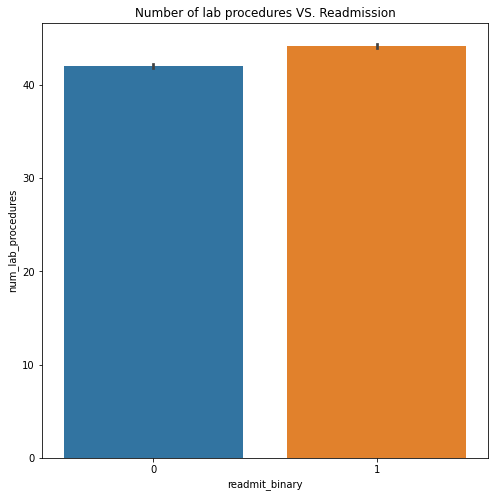

In [80]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df_clean['readmit_binary'], 
            y = df_clean['num_lab_procedures']
           ).set_title("Number of lab procedures VS. Readmission")
;

The readmitted patients have a higher mean of number of lab procedures.

In [81]:
df_clean['num_medications'].value_counts()

13    4121
12    4097
11    3866
15    3770
10    3719
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64

''

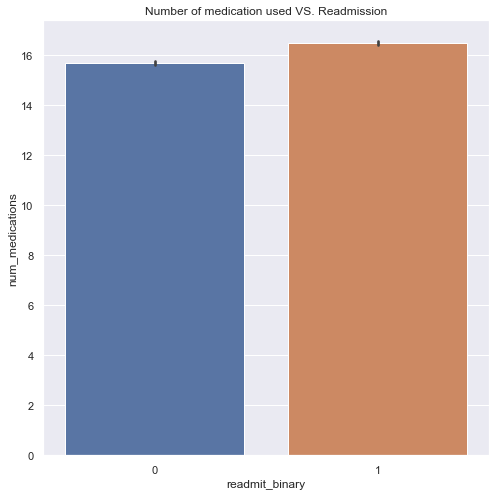

In [61]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df_clean['readmit_binary'], 
            y = df_clean['num_medications']
           ).set_title("Number of medication used VS. Readmission")
;

The readmitted patients have a higher mean of number of medications given during the visit.

In [83]:
df_clean['number_diagnoses'].value_counts()

9     30167
5      8267
6      7439
7      7327
8      7237
4      4317
3      2307
16       27
13       10
10        8
12        6
11        6
15        5
14        5
Name: number_diagnoses, dtype: int64

''

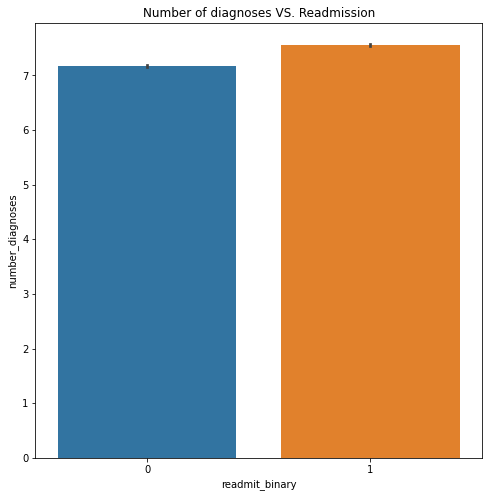

In [85]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df_clean['readmit_binary'], 
            y = df_clean['number_diagnoses']
           ).set_title("Number of diagnoses VS. Readmission")
;

The readmitted patients have a higher mean of number of diagnoses entered to the system.

In [86]:
df_clean['max_glu_serum'].value_counts()

None    63875
Norm     1656
>200      906
>300      691
Name: max_glu_serum, dtype: int64

In [88]:
df_clean.groupby('max_glu_serum')['readmit_binary'].value_counts().sort_values(ascending=False)

max_glu_serum  readmit_binary
None           0                 37618
               1                 26257
Norm           0                   956
               1                   700
>200           0                   486
               1                   420
>300           1                   350
               0                   341
Name: readmit_binary, dtype: int64

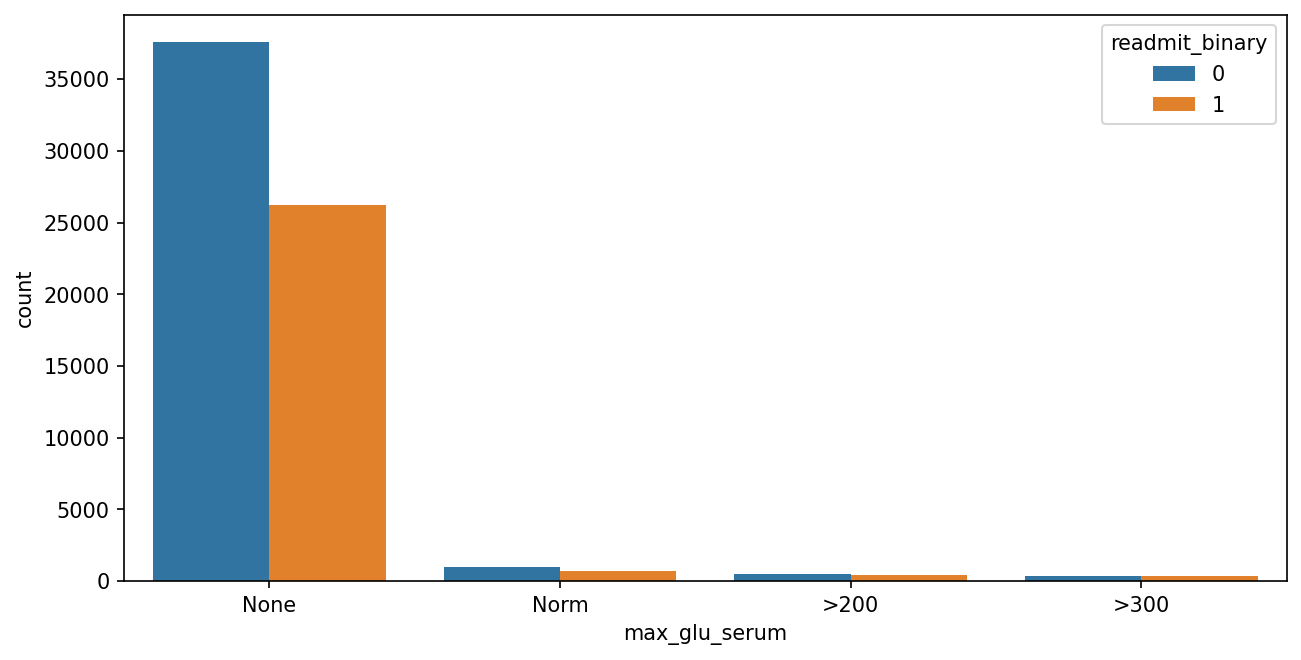

In [87]:
# Define the desired order of categories
glu_category_order = ['None', 'Norm', '>200', '>300']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "max_glu_serum", hue = "readmit_binary", order=glu_category_order)
plt.show()

As the glucose serum levels get higher, there are more percentage out of total patients getting readmitted.

In [89]:
# The A1C test is a blood test that provides information about your average levels 
# of blood glucose, also called blood sugar, over the past 3 months.

df_clean['A1Cresult'].value_counts()

None    54985
>8       5730
Norm     3633
>7       2780
Name: A1Cresult, dtype: int64

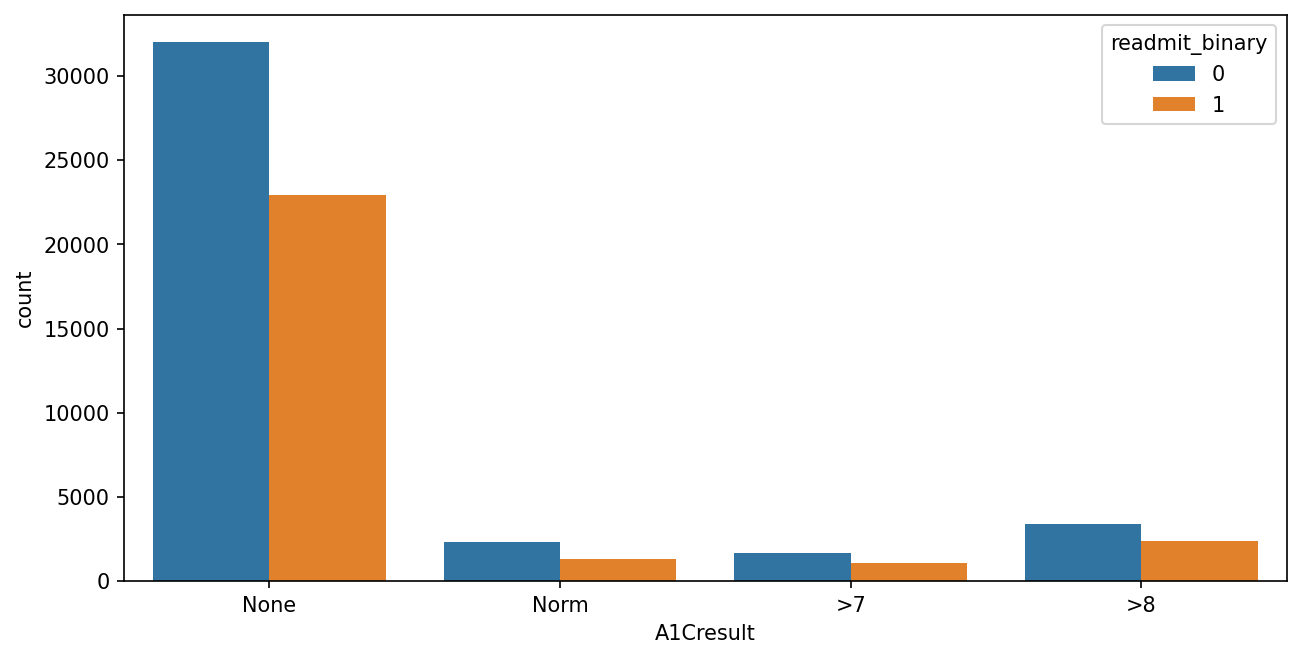

In [90]:
# Define the desired order of categories
A1C_category_order = ['None', 'Norm', '>7', '>8']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "A1Cresult", hue = "readmit_binary", order=A1C_category_order)
plt.show()

In [92]:
df_clean['age'].value_counts()

[70-80)     17191
[60-70)     15150
[50-60)     11886
[80-90)     10773
[40-50)      6482
[30-40)      2519
[90-100)     1704
[20-30)      1003
[10-20)       357
[0-10)         63
Name: age, dtype: int64

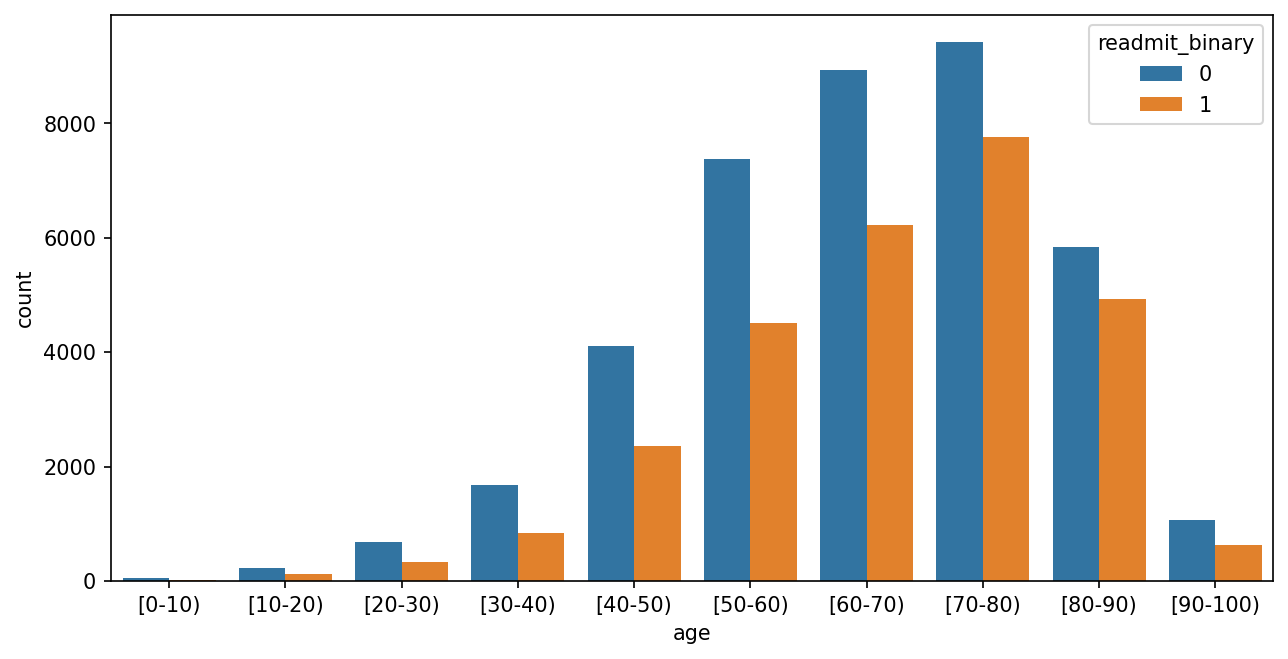

In [93]:
# Define the desired order of categories
age_category_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', 
                          '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "age", hue = "readmit_binary", order=age_category_order)
plt.show()

Seems like the age of patients who get readmitted are generally higher than those who don't get readmitted.

In [96]:
df_clean['insulin'].value_counts()

No        33110
Steady    20469
Down       7065
Up         6484
Name: insulin, dtype: int64

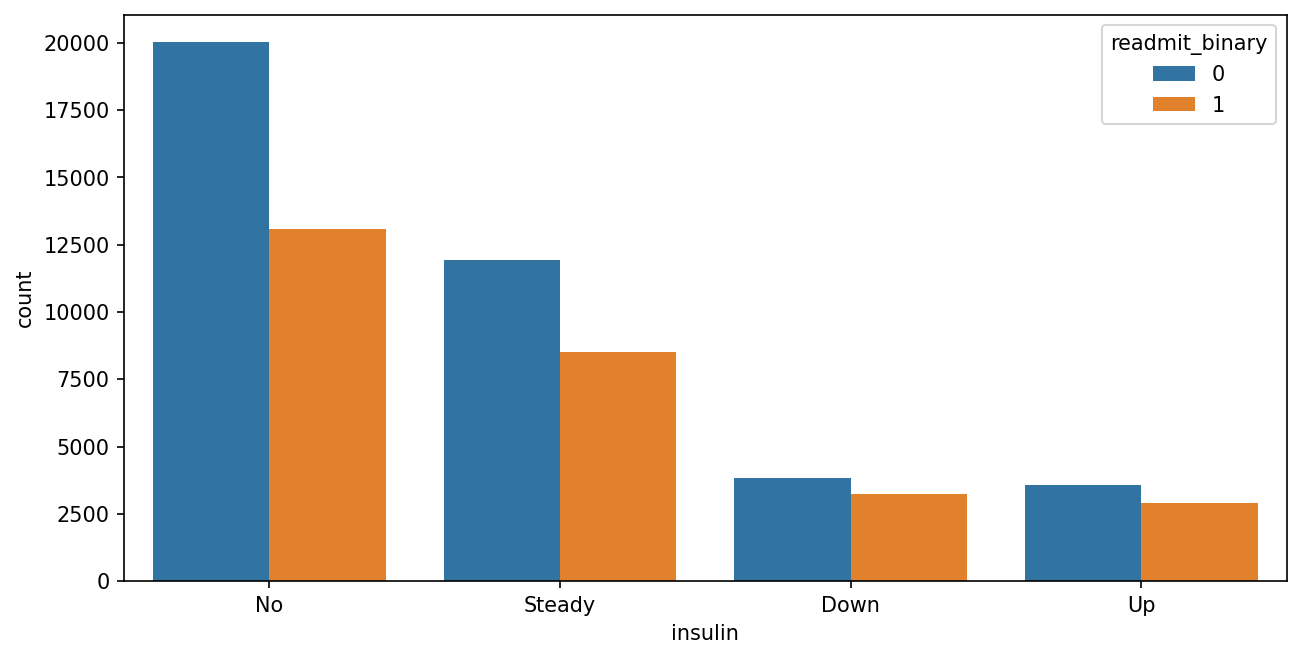

In [97]:
insulin_category_order = ['No', 'Steady', 'Down', 'Up']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "insulin", hue = "readmit_binary", order=insulin_category_order)
plt.show()

In [98]:
df_clean['diabetesMed'].value_counts()

Yes    51003
No     16125
Name: diabetesMed, dtype: int64

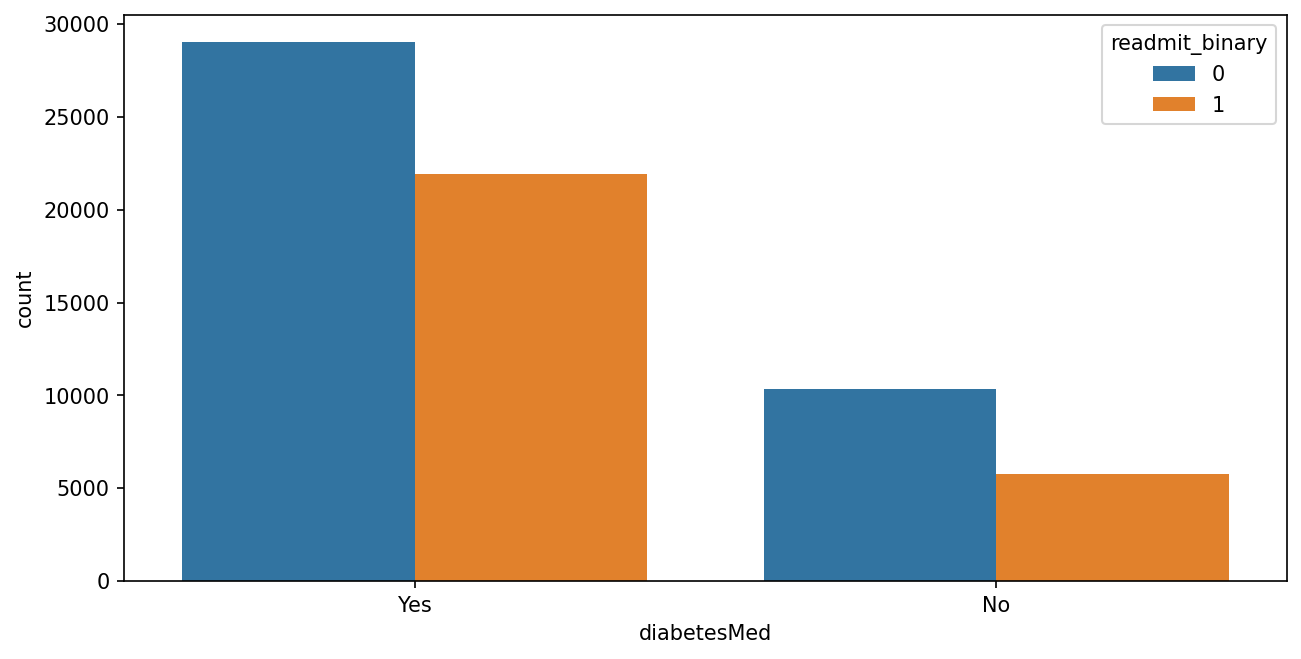

In [99]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "diabetesMed", hue = "readmit_binary")
plt.show()

Interesting that the patients not on diabetes med still have more that are not readmitted than those who are.

In [100]:
df_clean['race'].value_counts()

Caucasian          51653
AfricanAmerican    12405
Hispanic            1461
Other               1132
Asian                477
Name: race, dtype: int64

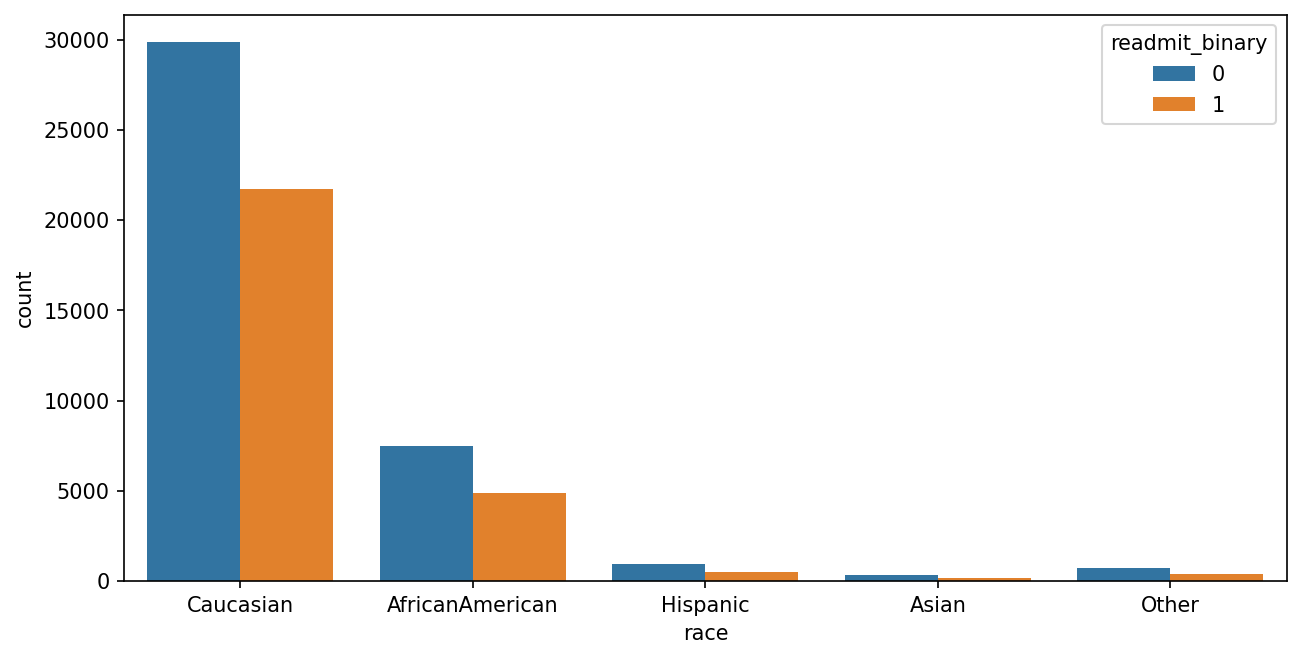

In [101]:
# Define the desired order of categories
race_category_order = ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "race", hue = "readmit_binary", order=race_category_order)
plt.show()

In [102]:
df_clean['gender'].value_counts()

Female    35808
Male      31320
Name: gender, dtype: int64

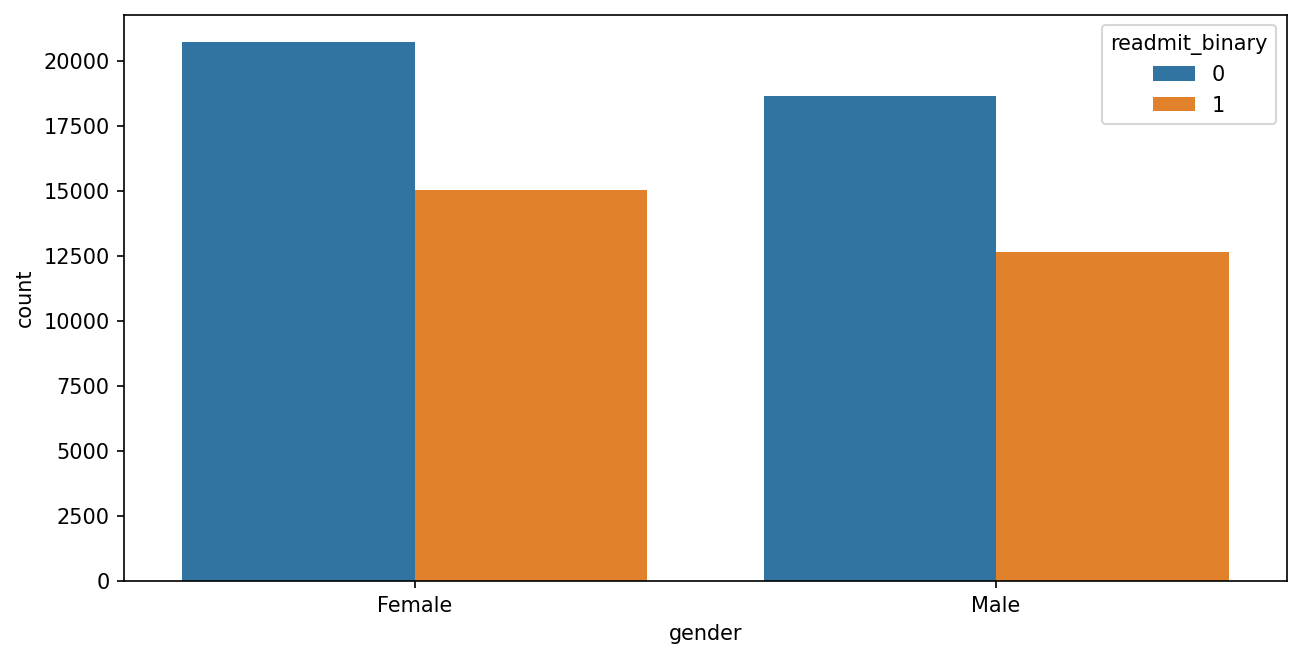

In [103]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "gender", hue = "readmit_binary")
plt.show()

In [196]:
df_clean['number_emergency'].value_counts()

0     62100
1      3825
2       779
3       240
4        94
5        31
6        25
8         9
7         8
10        5
9         4
11        2
37        1
13        1
16        1
20        1
25        1
42        1
Name: number_emergency, dtype: int64

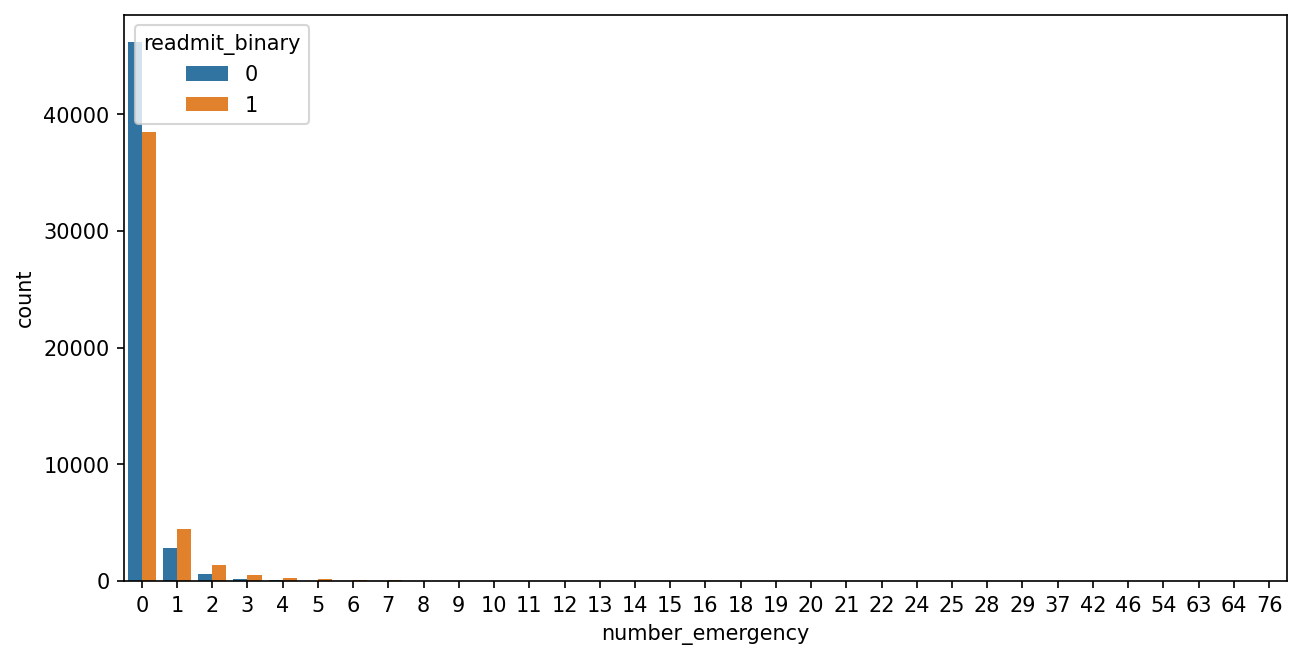

In [49]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "number_emergency", hue = "readmit_binary")
plt.show()

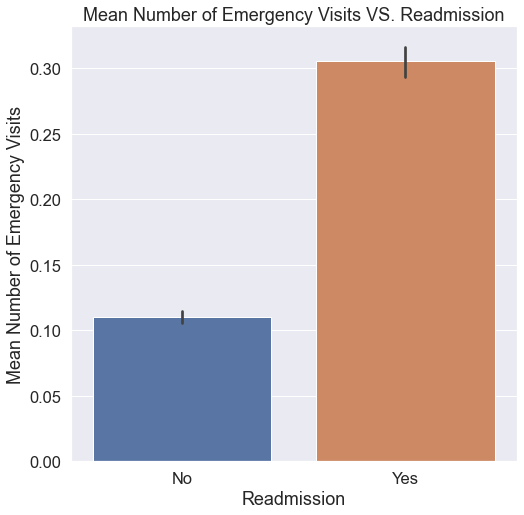

<Figure size 1080x432 with 0 Axes>

In [73]:
fig = plt.figure(figsize=(8, 8))
ax = sns.barplot(x=df_clean['readmit_binary'], y=df_clean['number_emergency'])

# Set the x tick labels
ax.set_xticklabels(['No', 'Yes'])

# Set the axis labels
ax.set_xlabel('Readmission')
ax.set_ylabel('Mean Number of Emergency Visits')

# Set the title
ax.set_title("Mean Number of Emergency Visits VS. Readmission")

plt.show()

plt.savefig('images/number_emergency.png');

# Checking for Skewness and Kurtosis (for logistic regression)

**Skewness and kurtosis** are statistical measures used to assess the shape and distribution of a variable. They can provide insights into the symmetry, tail heaviness, and presence of outliers in the data.

Skewness: Skewness measures the asymmetry of the distribution. It indicates whether the data is skewed to the left (negative skew) or to the right (positive skew), or if it is approximately symmetric (skewness close to zero). Skewness values greater than +1 or less than -1 suggest significant skewness.

- Positive skewness: The tail is longer on the right side, indicating a concentration of values on the left side.
- Negative skewness: The tail is longer on the left side, indicating a concentration of values on the right side.
- Skewness close to zero: The distribution is approximately symmetric.


Kurtosis: Kurtosis measures the heaviness of the tails and the presence of outliers. It tells us whether the data has heavy tails (leptokurtic) or light tails (platykurtic) compared to a normal distribution.

- Leptokurtic: Positive kurtosis indicates heavy tails, meaning the distribution has more outliers and extreme values.
- Platykurtic: Negative kurtosis indicates light tails, meaning the distribution has fewer outliers and extreme values.
- Mesokurtic: Kurtosis close to zero indicates a normal distribution with tails similar to a normal distribution.

In [64]:
# Get the list of the numerical variable  
num_features = list(set(list(df_clean._get_numeric_data().columns))- {'encounter_id', 'patient_nbr', 
                                                                      'readmitted'})
num_features

['num_medications',
 'number_emergency',
 'number_diagnoses',
 'readmit_binary',
 'num_procedures',
 'num_change',
 'num_service',
 'time_in_hospital',
 'num_lab_procedures',
 'number_outpatient',
 'num_meds',
 'number_inpatient']

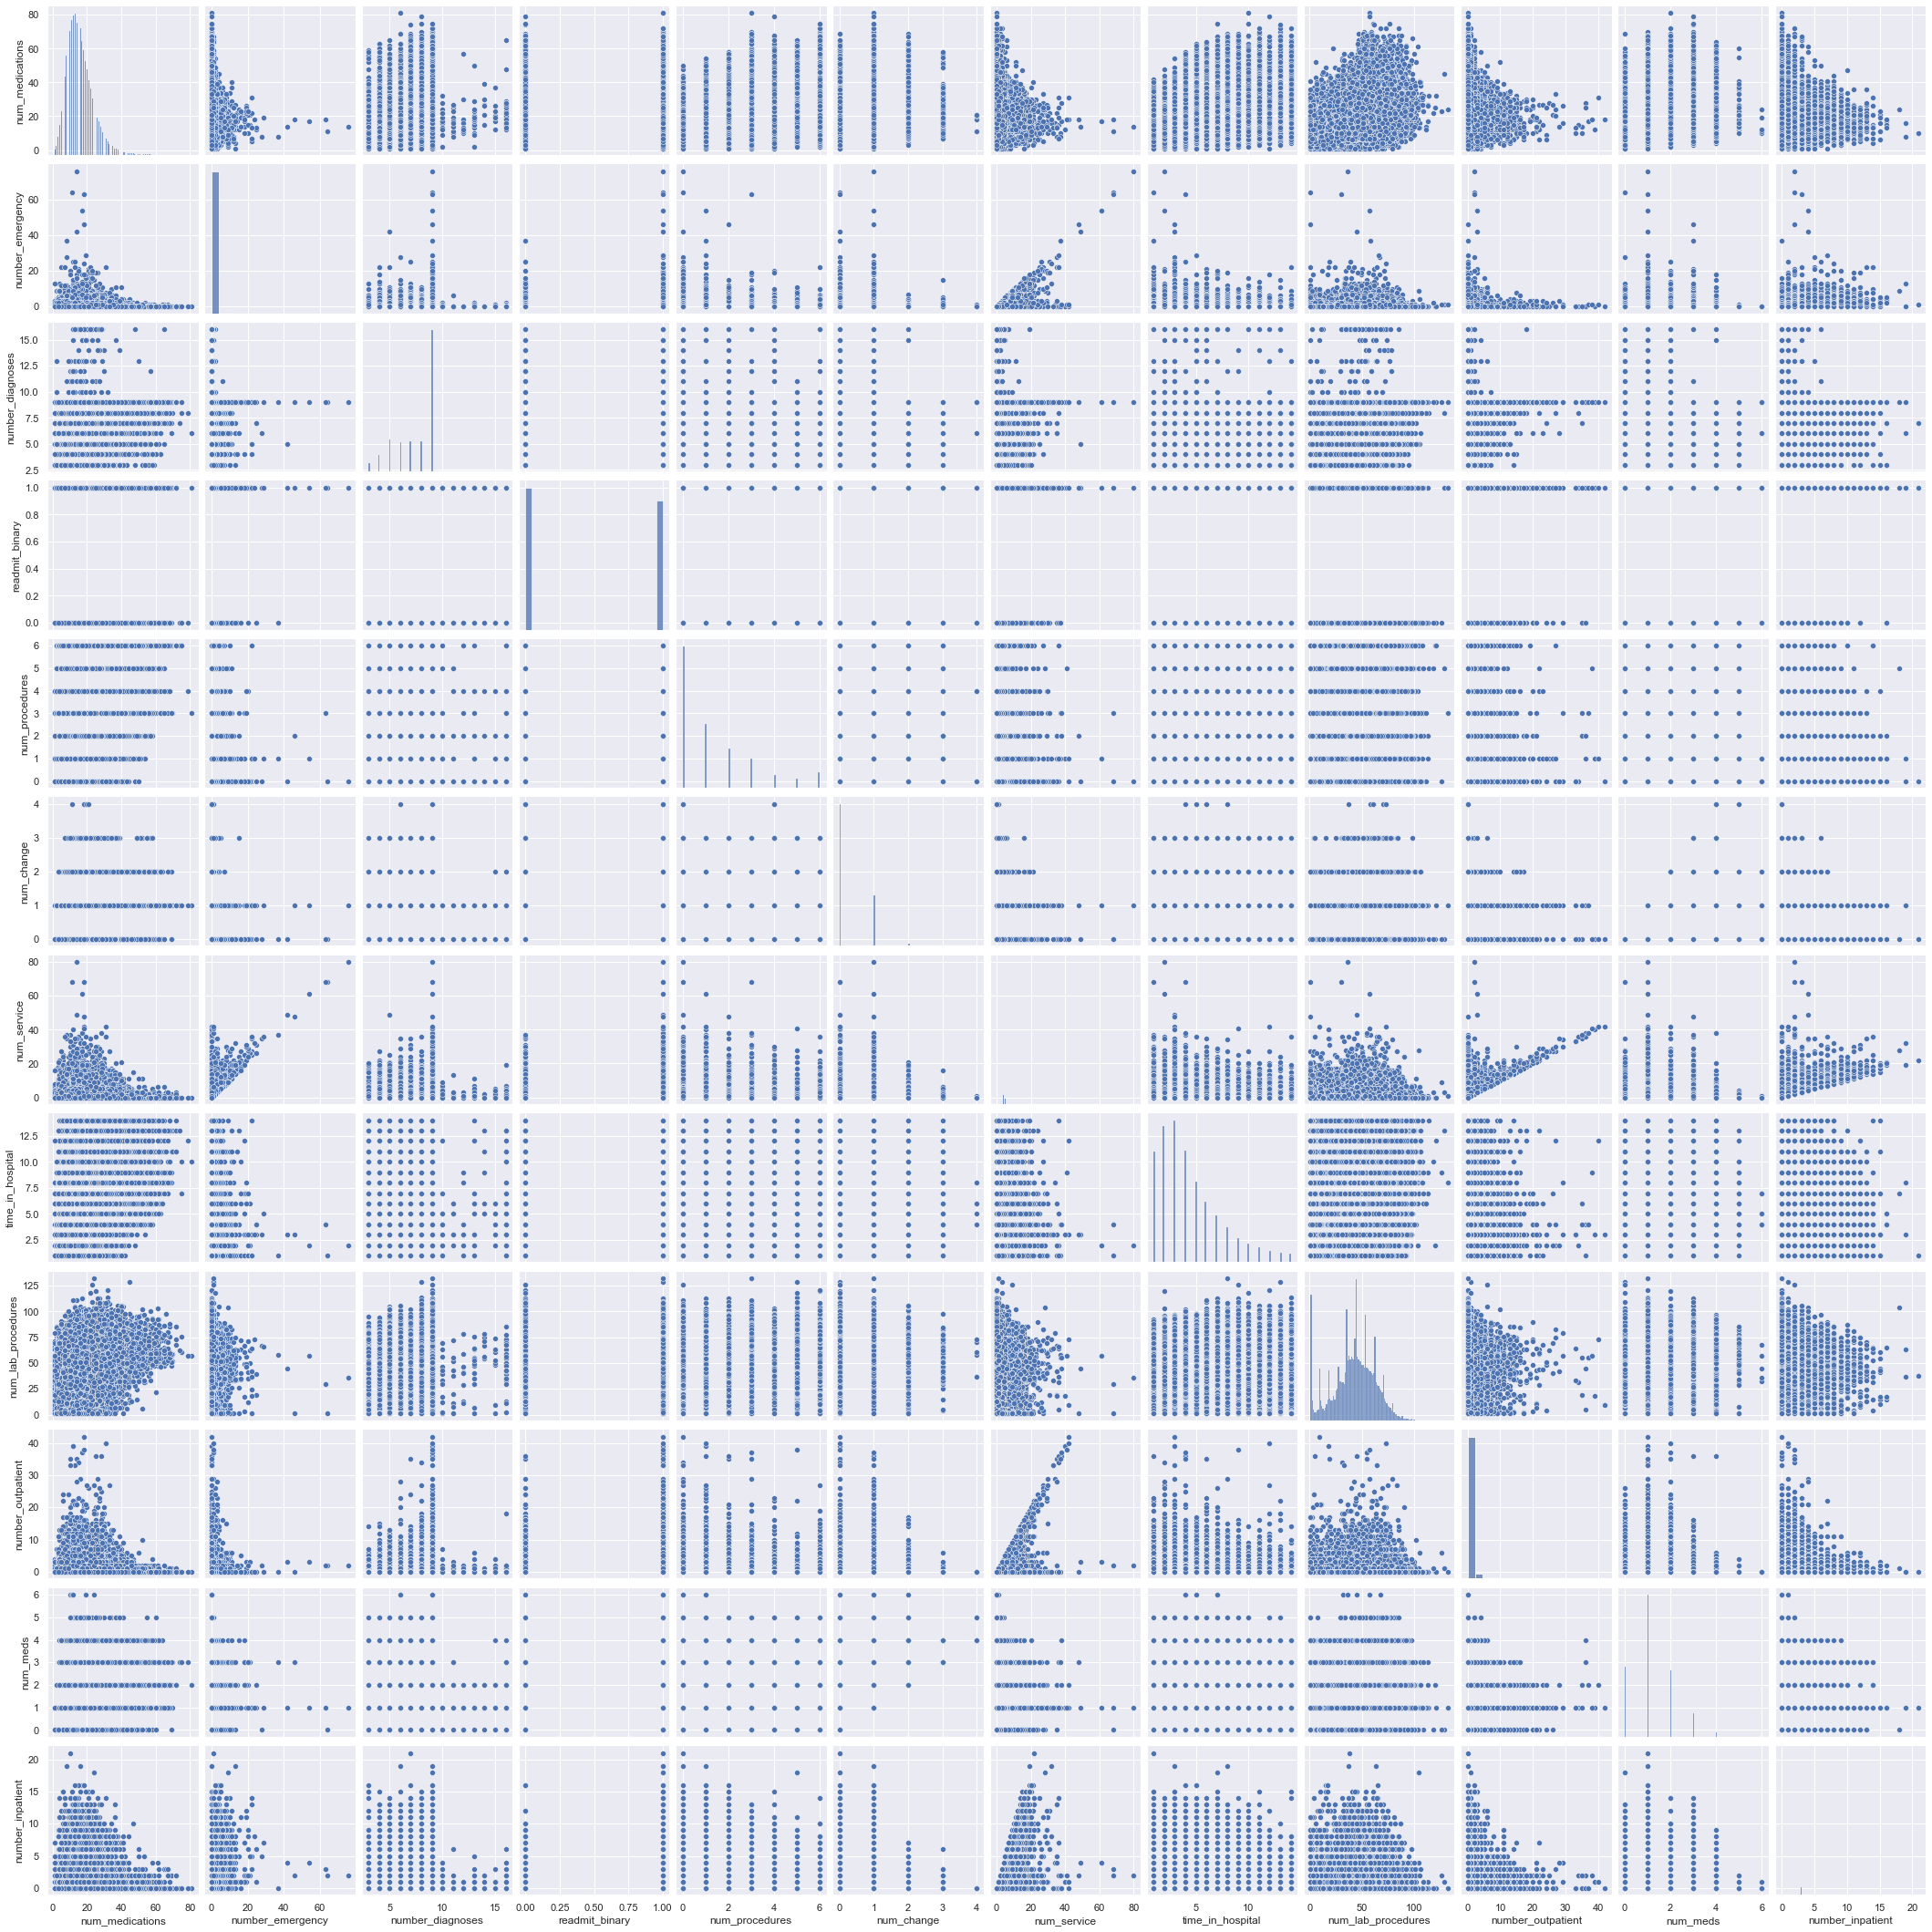

In [65]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = num_features
sns.pairplot(df_clean[cols], height = 2.5)
plt.show();

In [66]:
from scipy import stats
i=['number_emergency',
 'num_lab_procedures',
 'time_in_hospital',
 'number_diagnoses',
 'num_meds',
 'num_service',
 'num_procedures',
 'num_change',
 'num_medications',
 'number_outpatient',
 'number_inpatient']
print('**SKEW**')
print(df_clean[i].skew())
print("------------------------------------")
print('**KURT**')
print(df_clean[i].kurt())

**SKEW**
number_emergency      22.700399
num_lab_procedures    -0.240659
time_in_hospital       1.131482
number_diagnoses      -0.801359
num_meds               0.675799
num_service            5.326715
num_procedures         1.309298
num_change             1.428973
num_medications        1.341654
number_outpatient      8.788314
number_inpatient       3.572799
dtype: float64
------------------------------------
**KURT**
number_emergency      1162.894412
num_lab_procedures      -0.253107
time_in_hospital         0.855653
number_diagnoses        -0.385017
num_meds                 0.273402
num_service             67.469411
num_procedures           0.841867
num_change               1.464108
num_medications          3.559408
number_outpatient      146.704980
number_inpatient        20.116575
dtype: float64


Using the threshold=+-1 as skewness and kurtosis with a threhold=3 for normal distribution, I identified the features that need transformations. 

The variables that need to be transformed are: 1. number_emergency 2. time_in_hospital 3. num_service 4. num_procedures 5. num_change 6. num_medications 7. num_outpatient 8. num_inpatient

In [67]:
# log transforamtion for the skewed numerical variables 
key_log = ['number_emergency', 'time_in_hospital', 'num_service',
           'num_procedures', 'num_change', 'num_medications', 
           'number_outpatient', 'number_inpatient']

# make a new dataframe for transformed data
df_transformed = df_clean.copy()

for col in key_log:
    # Check if the absolute skewness of the column is greater than or equal to 1
    if abs(df_transformed[col].skew()) >= 1:
        # Create a new column name by appending "_log" to the original column name
        new_col_name = col + "_log"
        # Apply log transformation using np.log1p to the values in the column
        transformed_values = np.log1p(df_transformed[col])
        # Assign the transformed values to the new column in the dataframe
        df_transformed[new_col_name] = transformed_values
        # Print the column name and its skewness after the transformation
        print([new_col_name], df_transformed[new_col_name].skew())

['number_emergency_log'] 3.6195090244403927
['time_in_hospital_log'] 0.09683842779207859
['num_service_log'] 1.101598902002936
['num_procedures_log'] 0.5107539850555068
['num_change_log'] 1.1376408979067845
['num_medications_log'] -0.4686184907211042
['number_outpatient_log'] 2.7114387652579484
['number_inpatient_log'] 1.42955859978523


In [68]:
df_transformed

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,num_meds,num_service,number_emergency_log,time_in_hospital_log,num_service_log,num_procedures_log,num_change_log,num_medications_log,number_outpatient_log,number_inpatient_log
1,149190,55629189,Caucasian,Female,[10-20),emergency,home,emergencyRoom,3,59,...,1,0,0.0,1.386294,0.000000,0.000000,0.693147,2.944439,0.000000,0.000000
2,64410,86047875,AfricanAmerican,Female,[20-30),emergency,home,emergencyRoom,2,11,...,1,3,0.0,1.098612,1.386294,1.791759,0.000000,2.639057,1.098612,0.693147
3,500364,82442376,Caucasian,Male,[30-40),emergency,home,emergencyRoom,2,44,...,1,0,0.0,1.098612,0.000000,0.693147,0.693147,2.833213,0.000000,0.000000
4,16680,42519267,Caucasian,Male,[40-50),emergency,home,emergencyRoom,1,51,...,2,0,0.0,0.693147,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000
5,35754,82637451,Caucasian,Male,[50-60),emergency,home,referral,3,31,...,1,0,0.0,1.386294,0.000000,1.945910,0.000000,2.833213,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),emergency,transfered,emergencyRoom,3,51,...,2,0,0.0,1.386294,0.000000,0.000000,0.693147,2.833213,0.000000,0.000000
101762,443847782,74694222,AfricanAmerican,Female,[80-90),emergency,transfered,transfer,5,33,...,1,1,0.0,1.791759,0.693147,1.386294,0.000000,2.944439,0.000000,0.693147
101763,443854148,41088789,Caucasian,Male,[70-80),emergency,home,emergencyRoom,1,53,...,2,1,0.0,0.693147,0.693147,0.000000,0.693147,2.302585,0.693147,0.000000
101764,443857166,31693671,Caucasian,Female,[80-90),emergency,transfered,emergencyRoom,10,45,...,3,1,0.0,2.397895,0.693147,1.098612,0.693147,3.091042,0.000000,0.693147


# Correlation

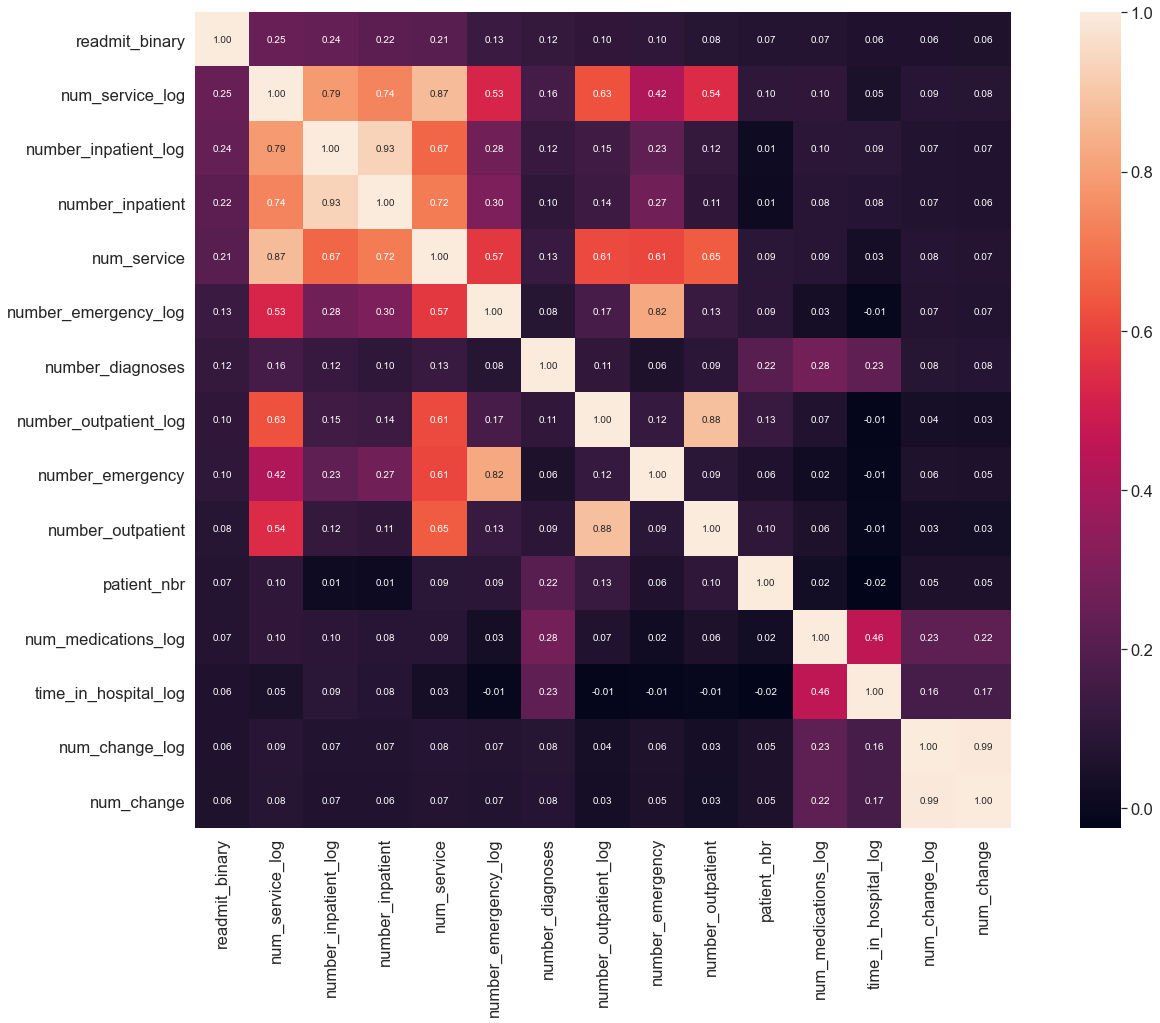

In [69]:
# find the top 15 correlated variables 

train_col = df_transformed.corr()
k = 15
cols = train_col.nlargest(k,'readmit_binary')['readmit_binary'].index
cm = np.corrcoef(df_transformed[cols].values.T)

sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show();

# Train-Test-Split

In [74]:
X = df_transformed.drop(['encounter_id', 'patient_nbr', 'readmit_binary', 'readmitted'], axis=1)
y = df_transformed['readmit_binary']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Making differnt x and y train/test for log transformation and normal

In [76]:
X_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'num_change',
       'num_meds', 'num_service', 'number_emergency_log',
       'time_in_hospital_log', 'num_service_log', 'num_procedures_log',
       'num_change_log', 'num_medications_log

In [77]:
def log_normal(data, columns_to_drop):
    transformed_data = data.drop(columns=columns_to_drop)
    return transformed_data

In [78]:
log_col = ['number_emergency_log', 'time_in_hospital_log', 'num_service_log', 
                                     'num_procedures_log', 'num_change_log', 'num_medications_log', 
                                     'number_outpatient_log', 'number_inpatient_log']
X_train_norm = log_normal(X_train, log_col)

In [79]:
X_train_norm.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'num_change',
       'num_meds', 'num_service'],
      dtype='object')

In [80]:
X_train_log = log_normal(X_train, key_log)

In [81]:
X_train_log.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'num_lab_procedures',
       'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'num_meds',
       'number_emergency_log', 'time_in_hospital_log', 'num_service_log',
       'num_procedures_log', 'num_change_log', 'num_medications_log',
       'number_outpatient_log', 'number_inpatient_log'],
      dtype='object')

In [82]:
X_train_log.shape, X_train_norm.shape, X_train.shape

((66970, 47), (66970, 47), (66970, 55))

In [84]:
X_test_norm = log_normal(X_test, log_col)

X_test_log = log_normal(X_test, key_log)

In [85]:
# sanity check
X_test_log.shape, X_test_norm.shape, X_test.shape

((28702, 47), (28702, 47), (28702, 55))

## Data Processing

I will transform data to handle the different features so that it is ready for modeling.

In [86]:
X.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                 

In [87]:
# numerical features
numerical_features = pd.Index(X.columns[X.dtypes != 'object'].values)
print(numerical_features)

numerical_features_norm = numerical_features.drop(log_col)
print(numerical_features_norm)

numerical_features_log = numerical_features.drop(key_log)
print(numerical_features_log)

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'num_change', 'num_meds',
       'num_service', 'number_emergency_log', 'time_in_hospital_log',
       'num_service_log', 'num_procedures_log', 'num_change_log',
       'num_medications_log', 'number_outpatient_log', 'number_inpatient_log'],
      dtype='object')
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'num_change', 'num_meds',
       'num_service'],
      dtype='object')
Index(['num_lab_procedures', 'number_diagnoses', 'num_meds',
       'number_emergency_log', 'time_in_hospital_log', 'num_service_log',
       'num_procedures_log', 'num_change_log', 'num_medications_log',
       'number_outpatient_log', 'number_inpatient_log'],
      dtype='object')


In [88]:
# object features
categorical_features = pd.Index(X.columns[X.dtypes == 'object'].values)
print(categorical_features)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')


In [89]:
# Looping over each numeric feature and printing its unique values
for feature in numerical_features:
    print(feature)
    print(X[feature].unique())

time_in_hospital
[ 3  2  1  4  5 13 12  9  7 10 11  6  8 14]
num_lab_procedures
[ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  19  64  25  53  52  87  27  37  41  28  36  48  10   2  65  67  40
  58  57  32  83  34  39  69  38  22  96  46  72  78  56  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6  94   8 102   7  89  91  92   4 101  99 100 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures
[0 5 1 6 2 3 4]
num_medications
[18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25 32  6 26
 24  4 33  5 27 39  3 30 29 61  1 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 48 57 53 59 56 63 58 70 67 64 60 69 65 68 66 81 79
 75 72 74]
number_outpatient
[ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 42 39 34 26 33 25 23 28 37 38 40]
number_emergency
[ 0  1  

In [90]:
# Looping over each object feature and printing its unique values
for feature in categorical_features:
    print(feature)
    print(X[feature].unique())

race
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male']
age
['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
admission_type_id
['emergency' 'elective' 'not_available' 'newborn']
discharge_disposition_id
['home' 'transfered' 'left_AMA' 'not_available' 'outpatient']
admission_source_id
['emergencyRoom' 'referral' 'transfer' 'unavailable']
diag_1
['other' 'pregnancy' 'infections' 'neoplasms' 'circulatory' 'respiratory'
 'injury' 'skin' 'unknown' 'ill-defined' 'genitourinary' 'mental'
 'musculoskeletal' 'digestive' 'nervous' 'blood' 'sense' 'congenital']
diag_2
['other' 'neoplasms' 'circulatory' 'respiratory' 'blood' 'injury'
 'musculoskeletal' 'genitourinary' 'infections' 'digestive' 'skin'
 'unknown' 'nervous' 'ill-defined' 'mental' 'pregnancy' 'congenital'
 'sense']
diag_3
['other' 'unknown' 'circulatory' 'infections' 'respiratory' 'injury'
 'neoplasms' 'genitourinary' 'ill-defined' 'digestive' 'skin'

In [91]:
# ordinal and nominal categorical features
ordinal_col = pd.Index(['age'])

nominal_col = np.array(categorical_features)
nominal_col = pd.Index(nominal_col[nominal_col != 'age']).values

### Data Preprocessing Function: `preprocess_data` and `SS_scaler`
The `preprocess_data` function takes the training and testing datasets along with a list of ordinal columns as input. It creates copies of the input datasets to avoid modifying the original data. The function then proceeds to process the ordinal columns using the `OrdinalEncoder` from scikit-learn.

For each ordinal column, the function first determines the unique categories present in the training data. It then uses these categories to create an instance of `OrdinalEncoder` with the specified categories. The `OrdinalEncoder` performs ordinal encoding on the training data, transforming the values into numerical representations based on the order of the categories.

After encoding the training data, the function applies the same encoding to the testing data using the `transform` method of the `OrdinalEncoder`. However, to handle unknown categories in the testing data, the function replaces any values that are not present in the training data's categories with `NaN` (missing value). This ensures that the testing data is consistent with the categories used for encoding.

Finally, the function returns the processed training and testing datasets, where the ordinal columns have been encoded using the `OrdinalEncoder`, and any unknown categories in the testing data have been handled appropriately.

The `SS_scaler` function is designed to scale the input data using `StandardScaler`. It takes in both the training data, `X_train`, and testing data, `X_test`, and applies the `fit_transform` method on the training data to learn the scaling parameters and transform the data accordingly. For the testing data, it only applies the `transform` method to maintain consistency with the scaling parameters learned from the training data. The function returns the scaled versions of both the training and testing data.

Using functions like `preprocess_data` and `SS_scaler` provides several advantages over hard coding the preprocessing steps for both training and testing data. It promotes code modularity and reusability, allowing you to easily apply the same preprocessing steps to new datasets. Additionally, it enhances code readability and maintainability, as the preprocessing steps are encapsulated within functions with descriptive names, making it easier to understand and modify the code as needed.

In [102]:
def preprocess_data(X_train, X_test, ordinal_col):
    # Create a copy of the input dataframes
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    # Process ordinal columns using OrdinalEncoder
    for feature in ordinal_col:
        # Define the categories for the ordinal feature using the training data
        categories = np.unique(X_train_processed[feature])
        # Perform ordinal encoding on the training data
        ordinal_encoder = OrdinalEncoder(categories=[categories])
        X_train_processed.loc[:, feature] = ordinal_encoder.fit_transform(
            X_train_processed.loc[:, feature].values.reshape(-1, 1))
        # Perform ordinal encoding on the testing data
        X_test_processed.loc[:, feature] = ordinal_encoder.transform(
            X_test_processed.loc[:, feature].values.reshape(-1, 1))
        # Handle unknown categories in the testing data
        X_test_processed.loc[:, feature] = np.where(
            X_test_processed.loc[:, feature].isin(categories),
            X_test_processed.loc[:, feature],
            np.nan
        )
        
    return X_train_processed, X_test_processed


def SS_scaler(X_train, X_test):
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [93]:
X_train_p_norm , X_test_p_norm = preprocess_data(X_train_norm, X_test_norm, ordinal_col)

In [98]:
# sanity check
X_train_p_norm['age'], X_train['age']

(9940     3.0
 7877     8.0
 70552    6.0
 39014    7.0
 85293    9.0
         ... 
 6740     7.0
 58671    6.0
 81721    6.0
 934      4.0
 16868    7.0
 Name: age, Length: 66970, dtype: float64,
 9940      [30-40)
 7877      [80-90)
 70552     [60-70)
 39014     [70-80)
 85293    [90-100)
            ...   
 6740      [70-80)
 58671     [60-70)
 81721     [60-70)
 934       [40-50)
 16868     [70-80)
 Name: age, Length: 66970, dtype: object)

In [100]:
X_train_p_log , X_test_p_log = preprocess_data(X_train_log, X_test_log, ordinal_col)

In [103]:
X_train_sc_norm , X_test_sc_norm = SS_scaler(X_train_p_norm, X_test_p_norm)

ValueError: could not convert string to float: 'AfricanAmerican'